In [24]:
#Importando as bibliotecas

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#Carregando o dataset

In [27]:
df = pd.read_csv('train.csv')

In [28]:
#Dividindo o dataframe entre valores numéricos e categóricos

In [29]:
numeric_data = df.select_dtypes(include = [np.number])
categorical_data = df.select_dtypes(exclude = [np.number])

In [30]:
#Describe para analisar os valores numéricos

In [31]:
numeric_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [32]:
#Gráficos dos valores numéricos para melhor visualização da distribuição e dos outliers

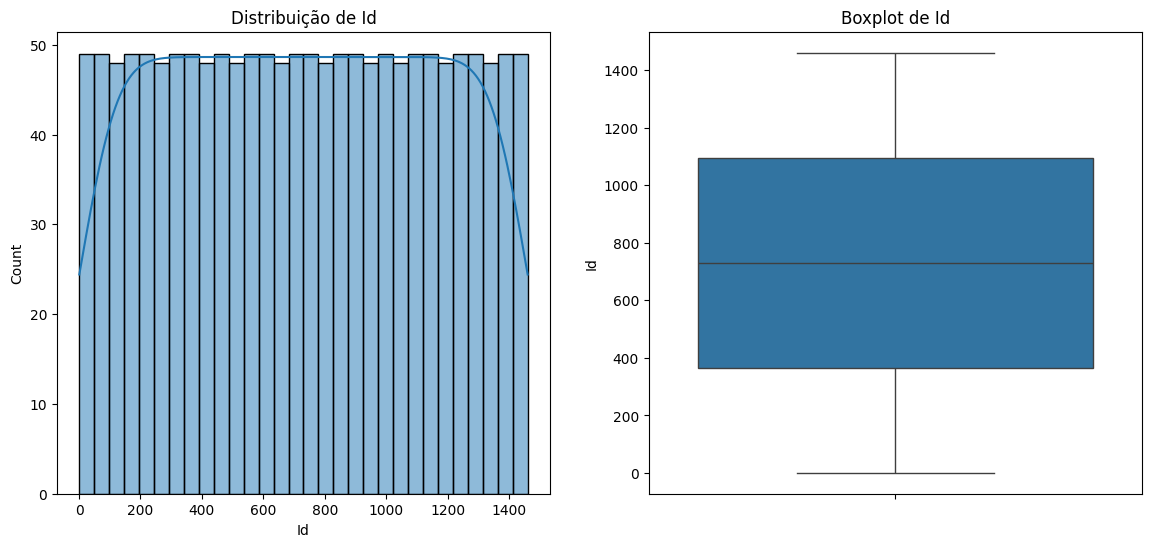

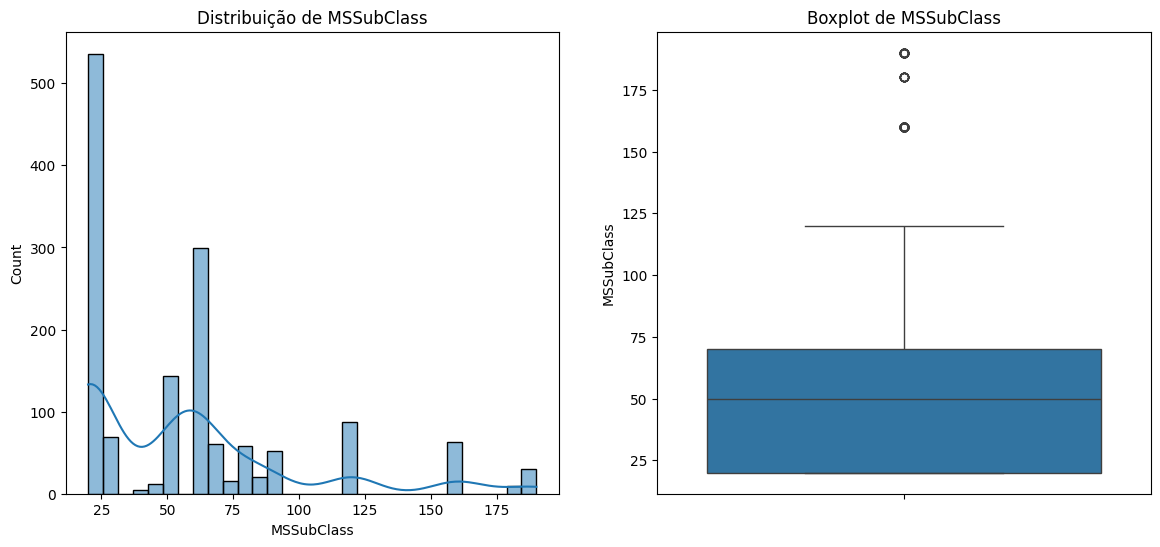

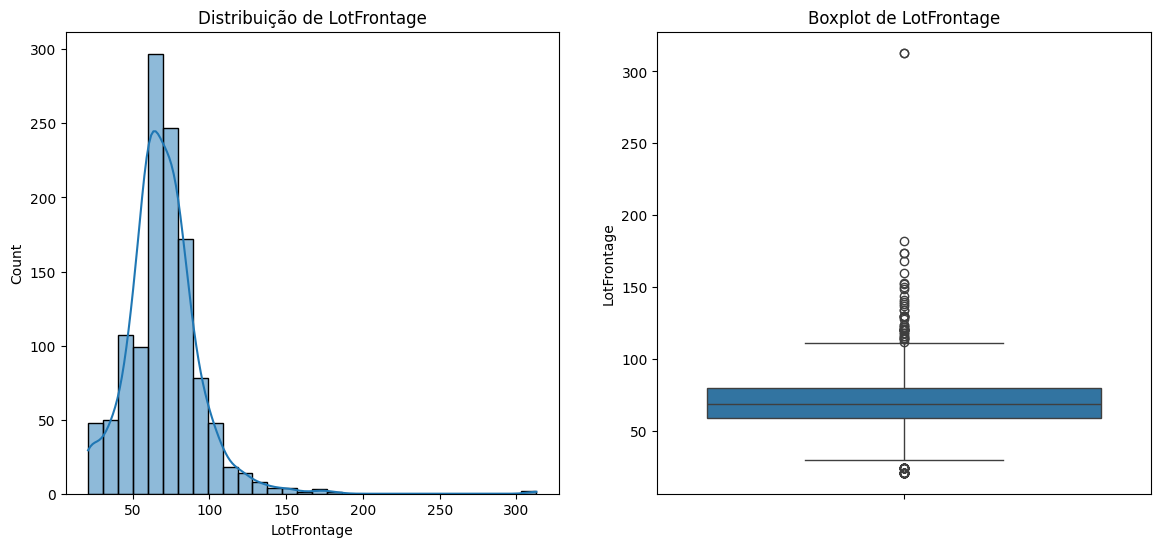

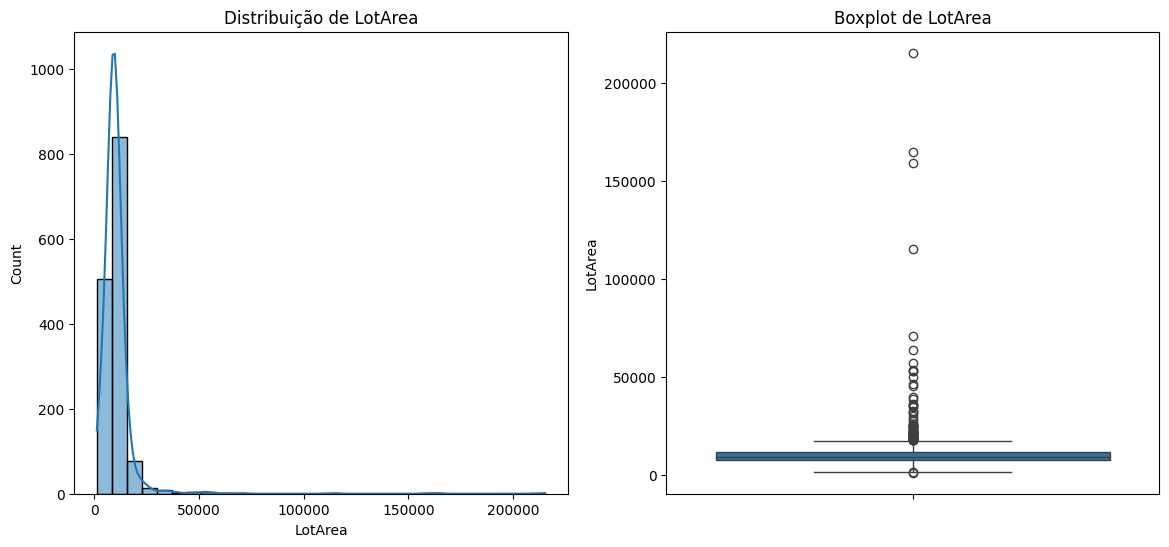

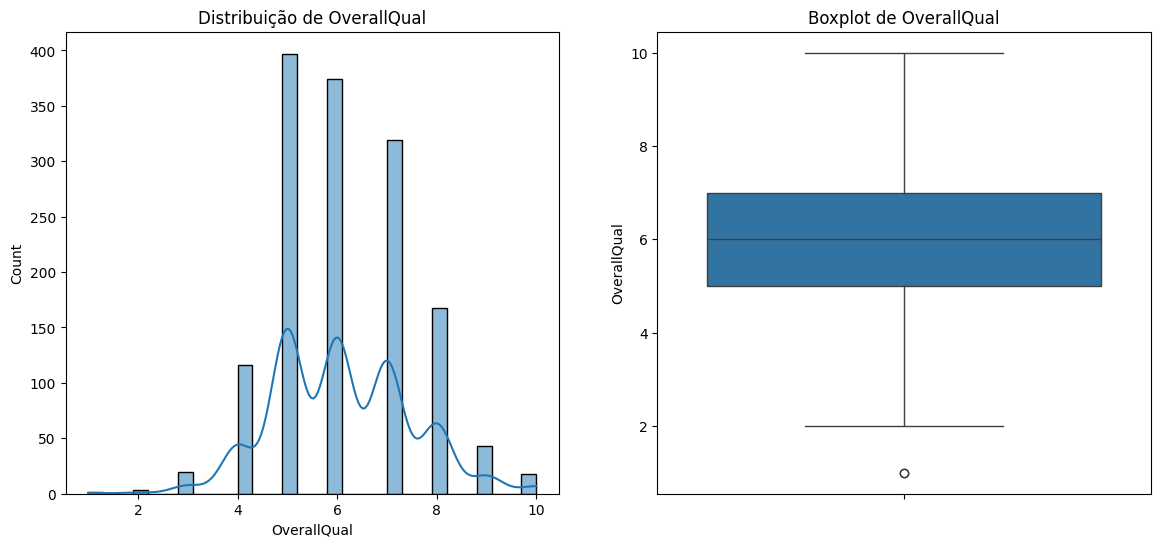

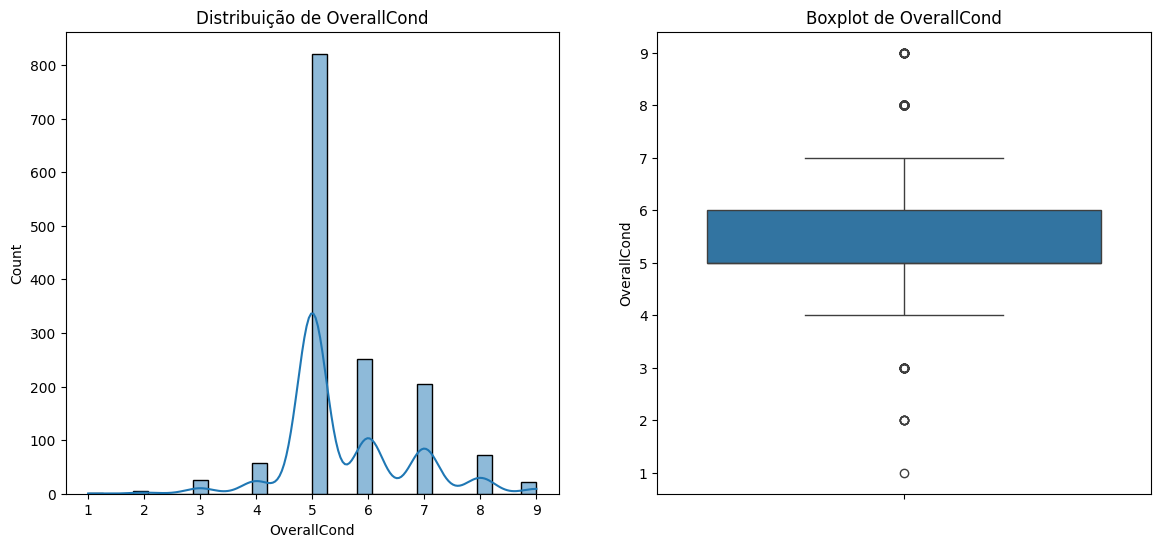

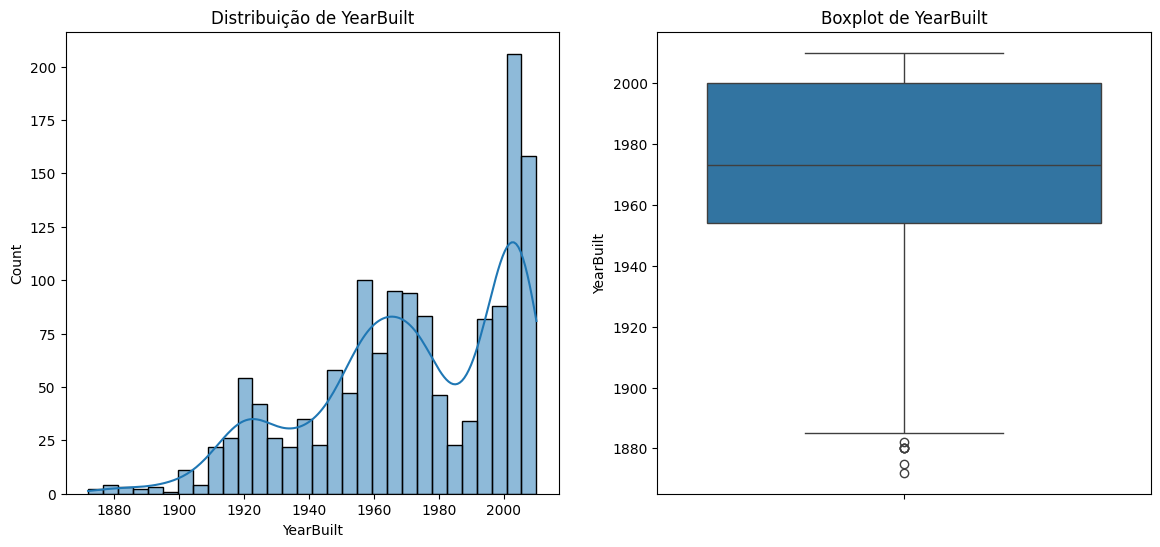

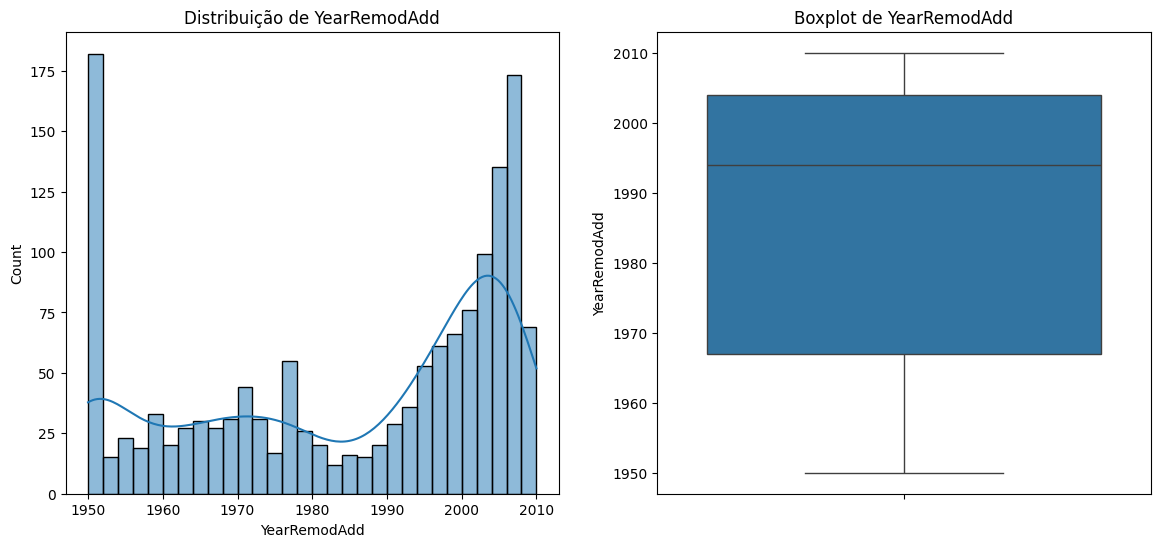

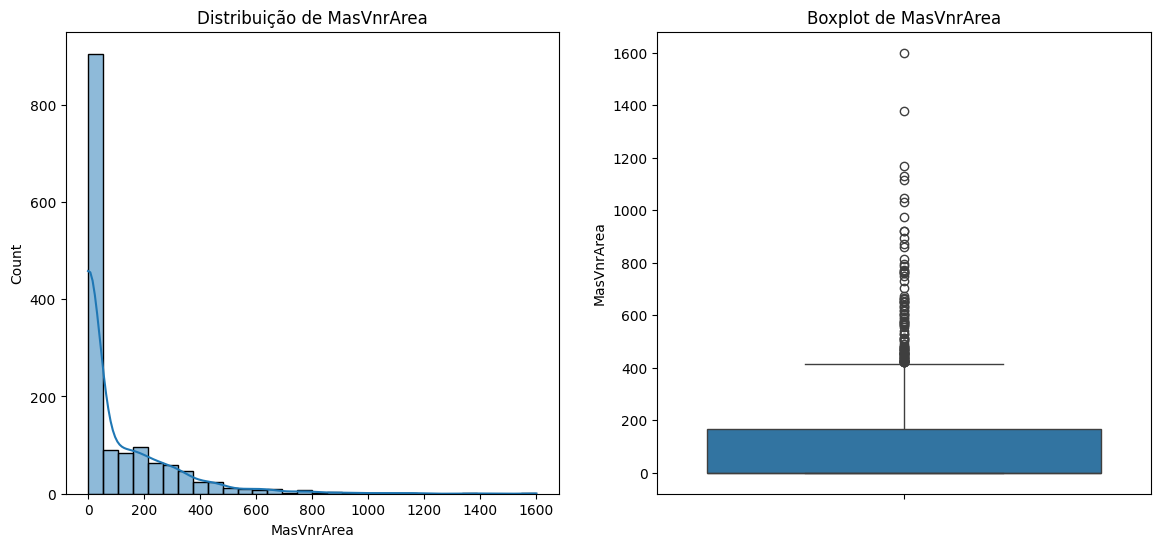

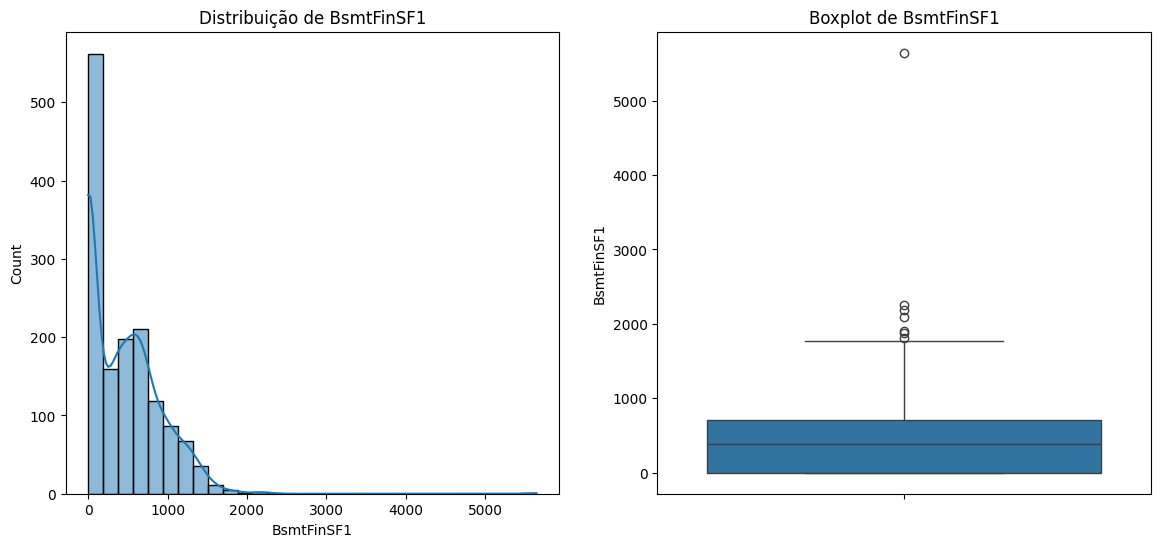

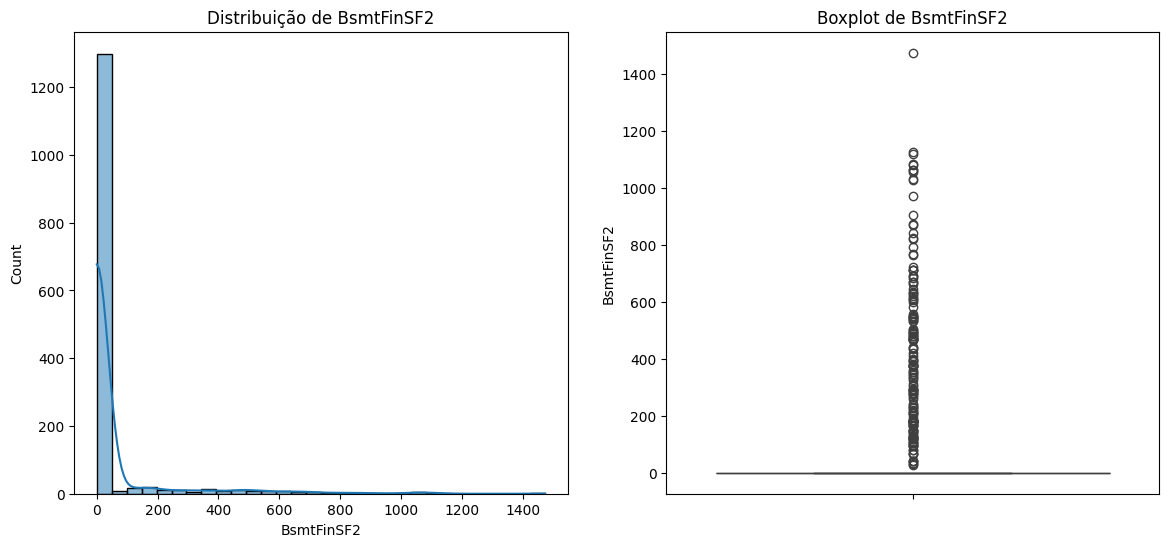

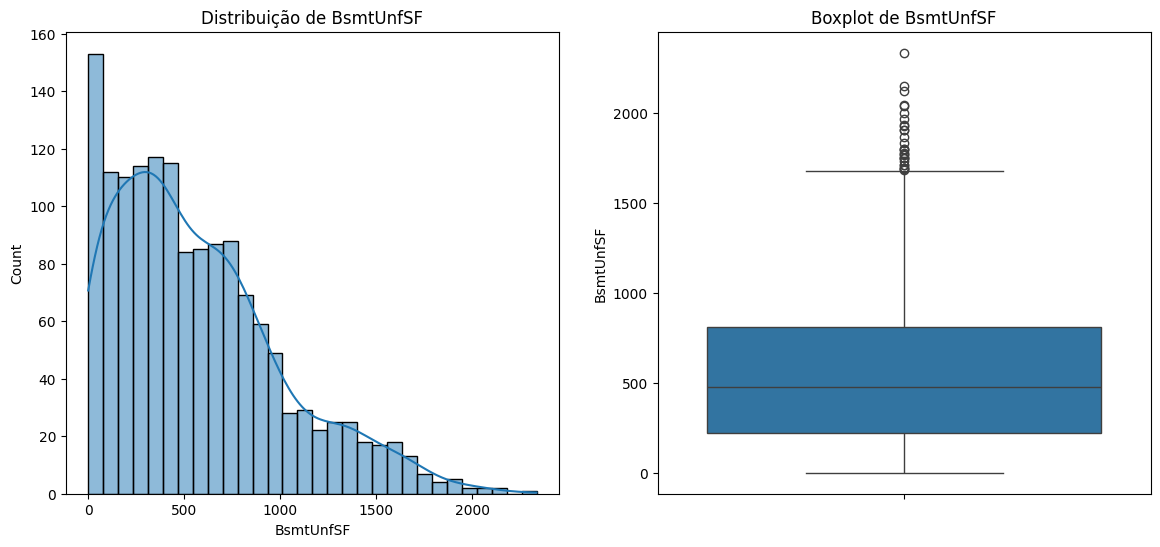

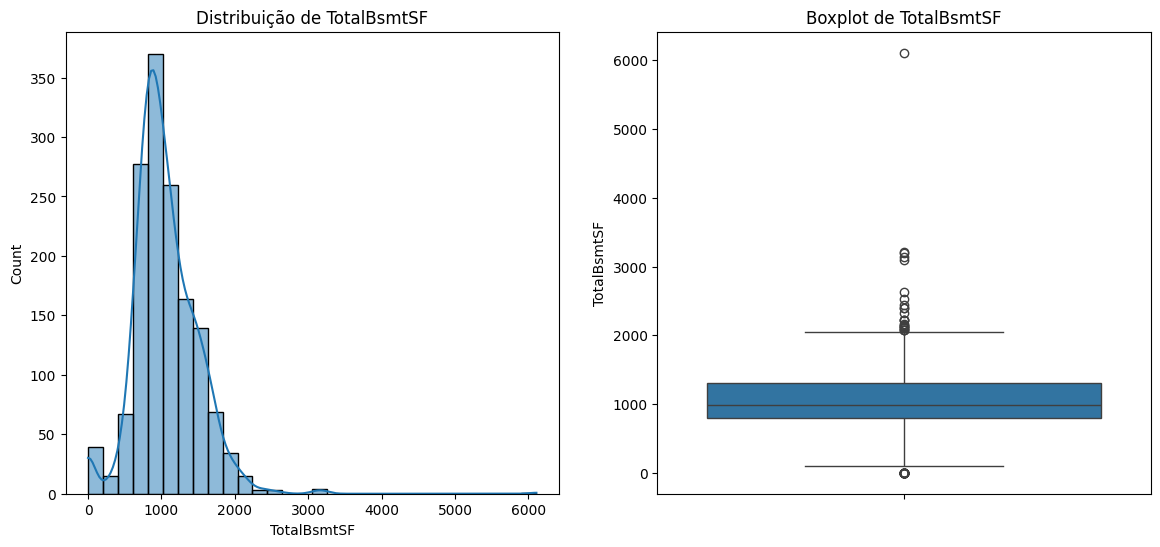

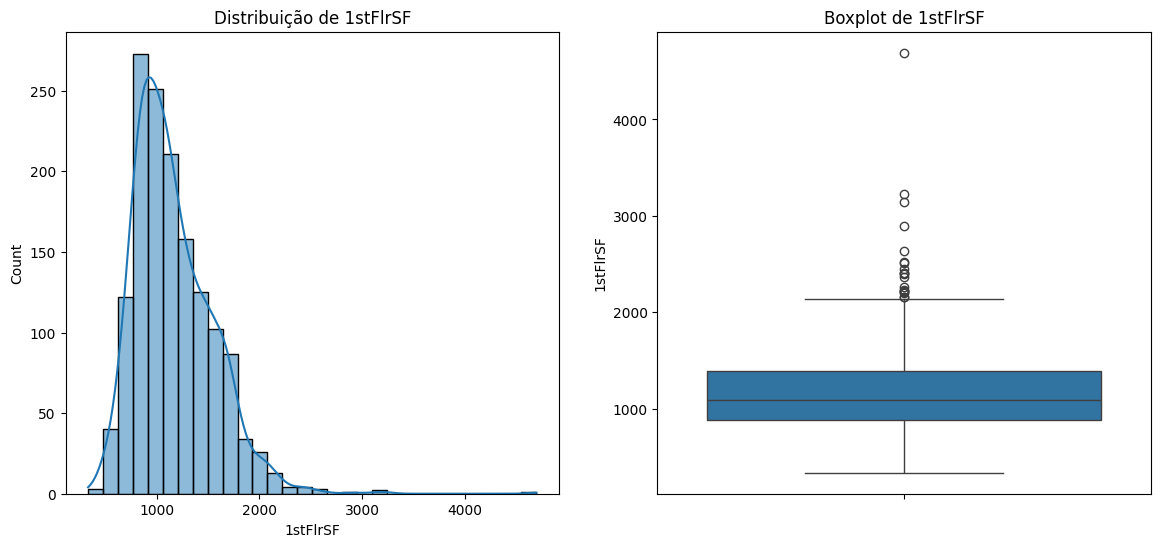

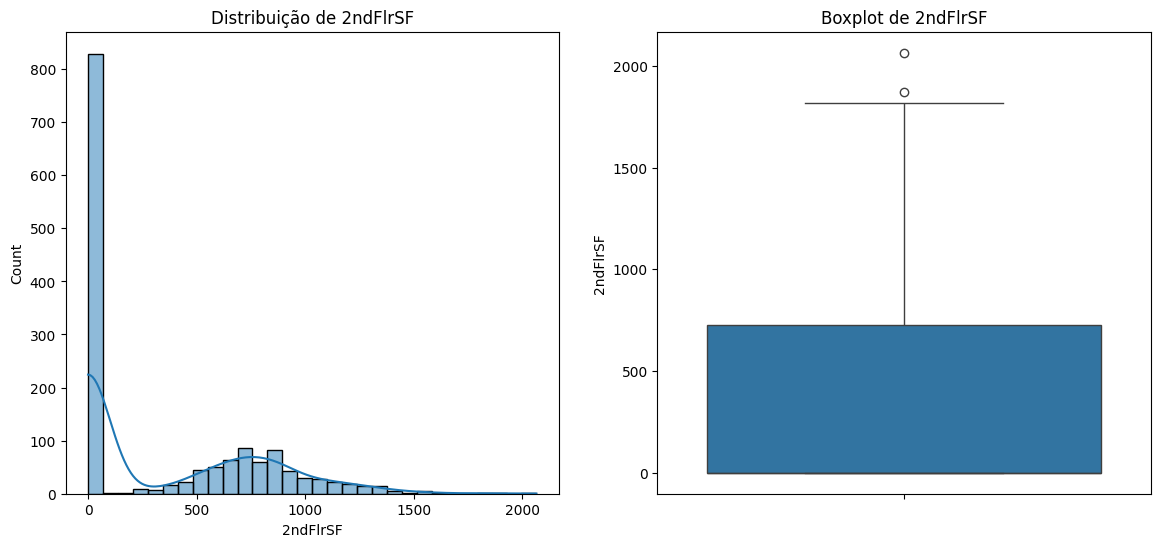

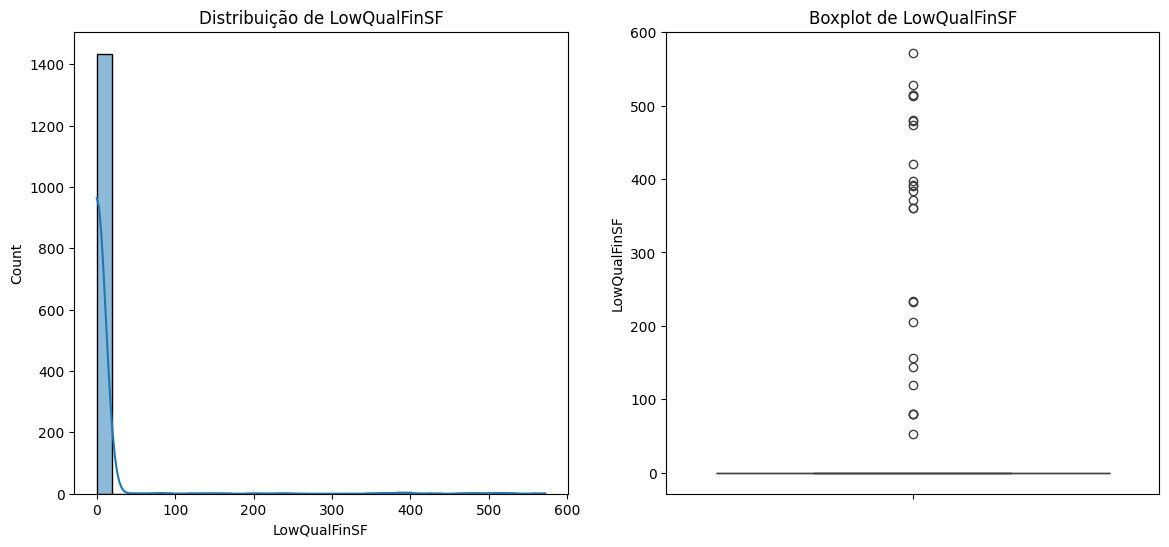

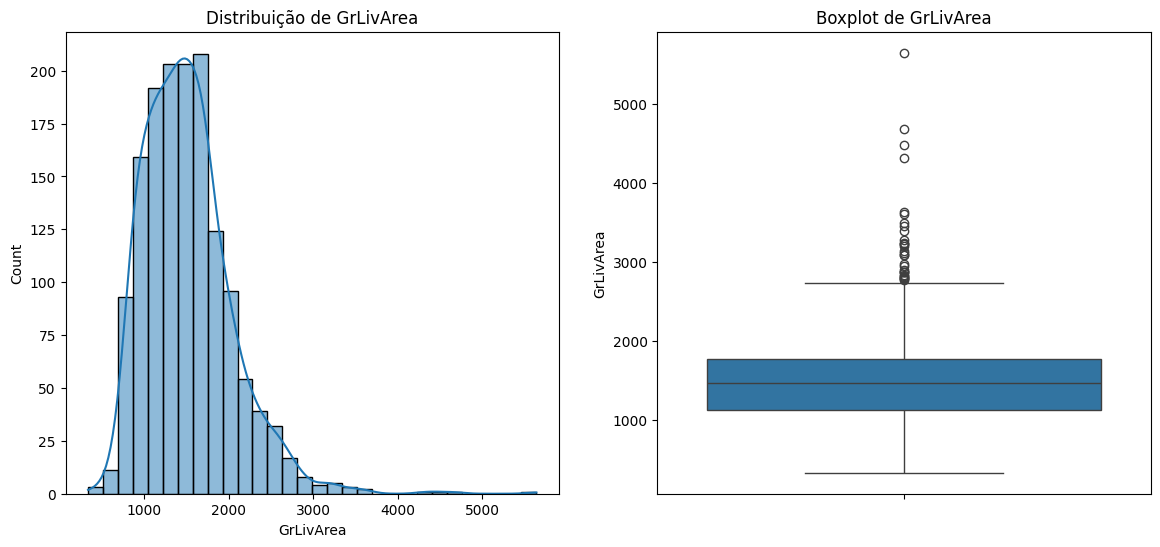

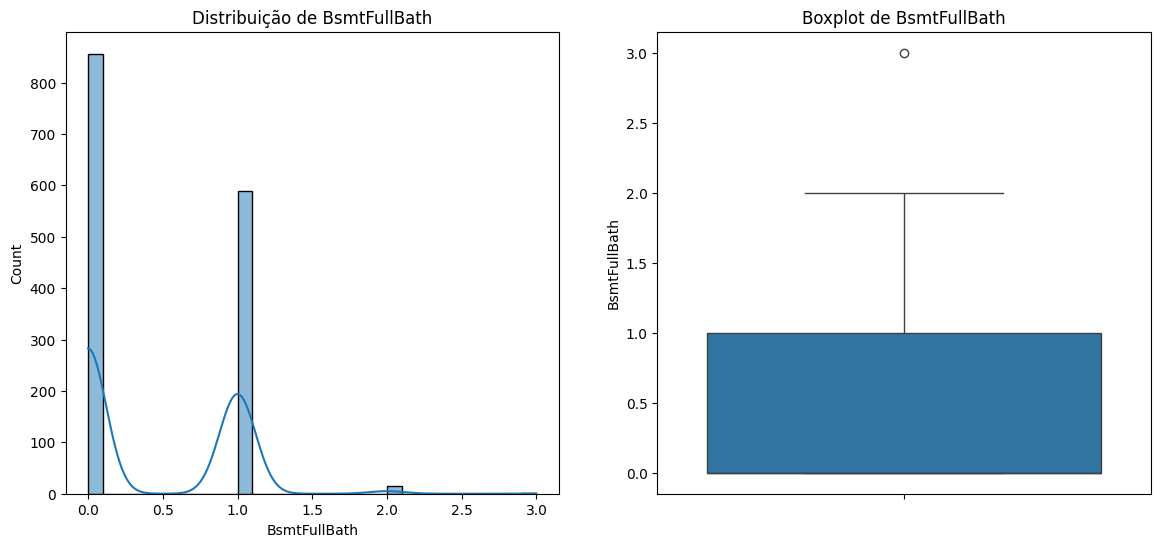

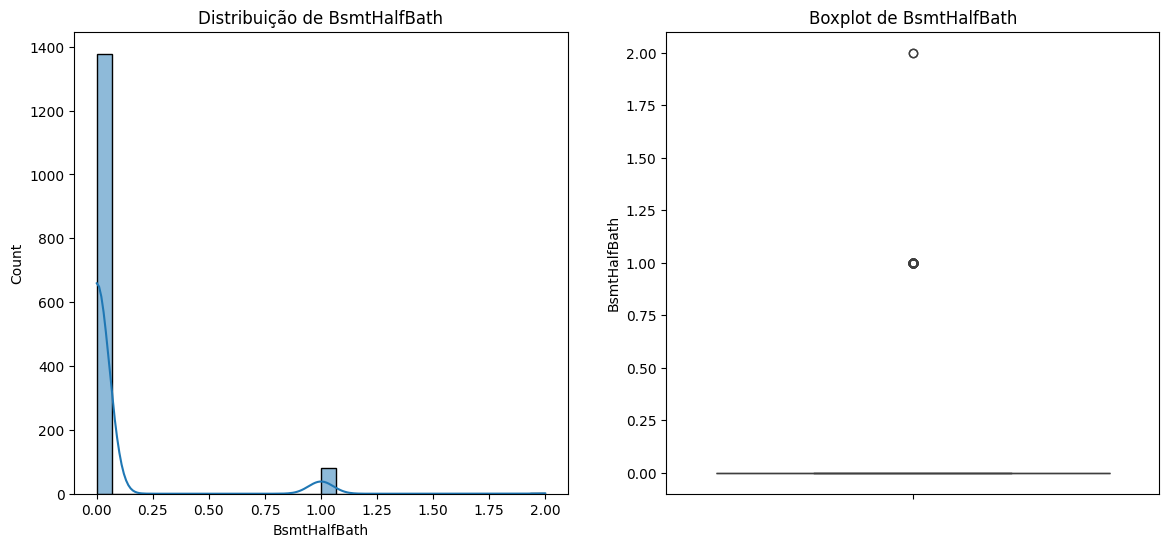

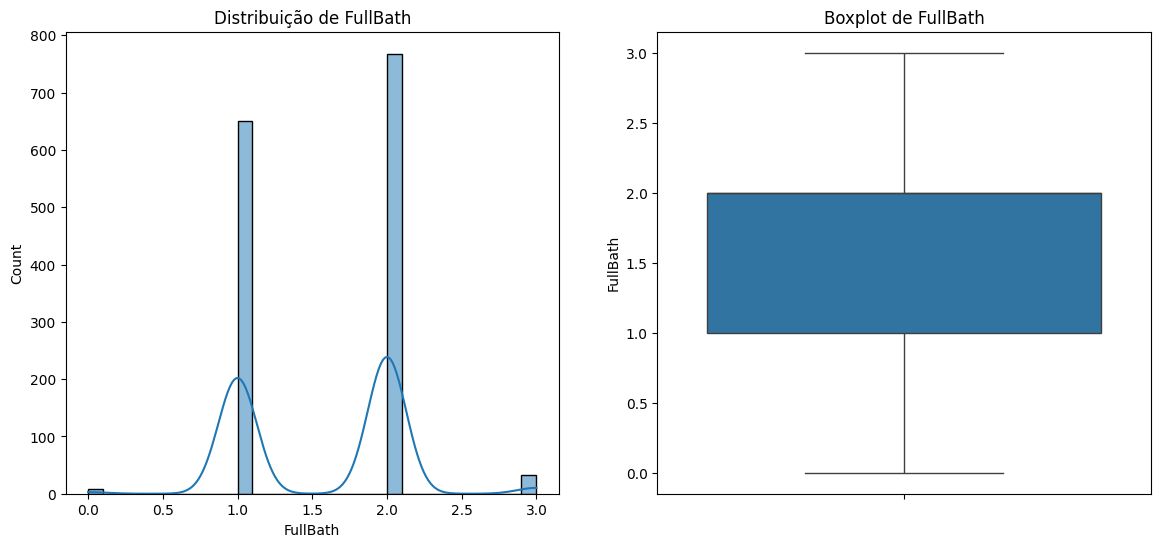

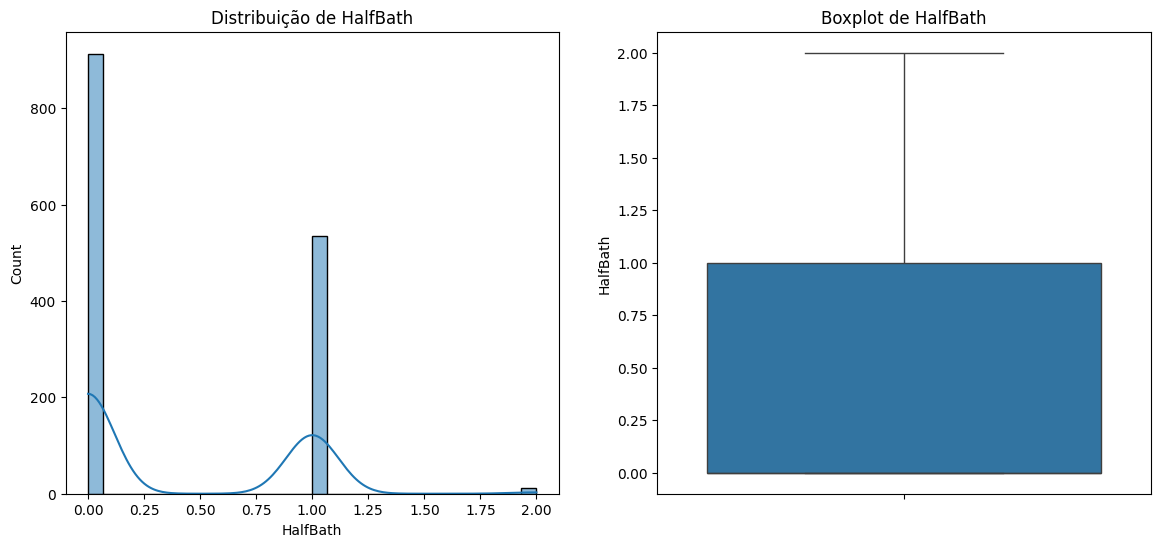

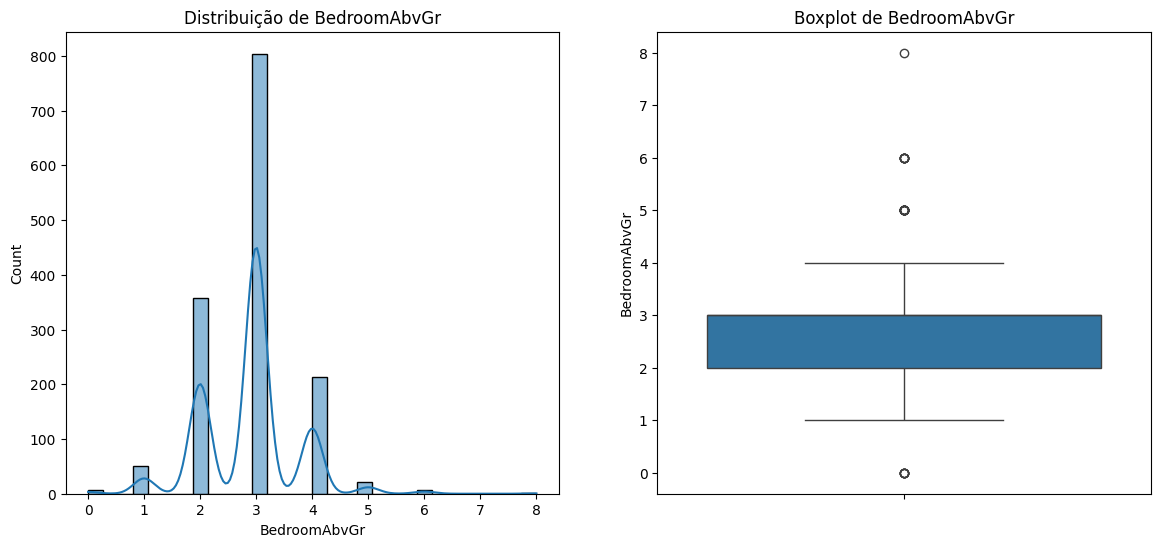

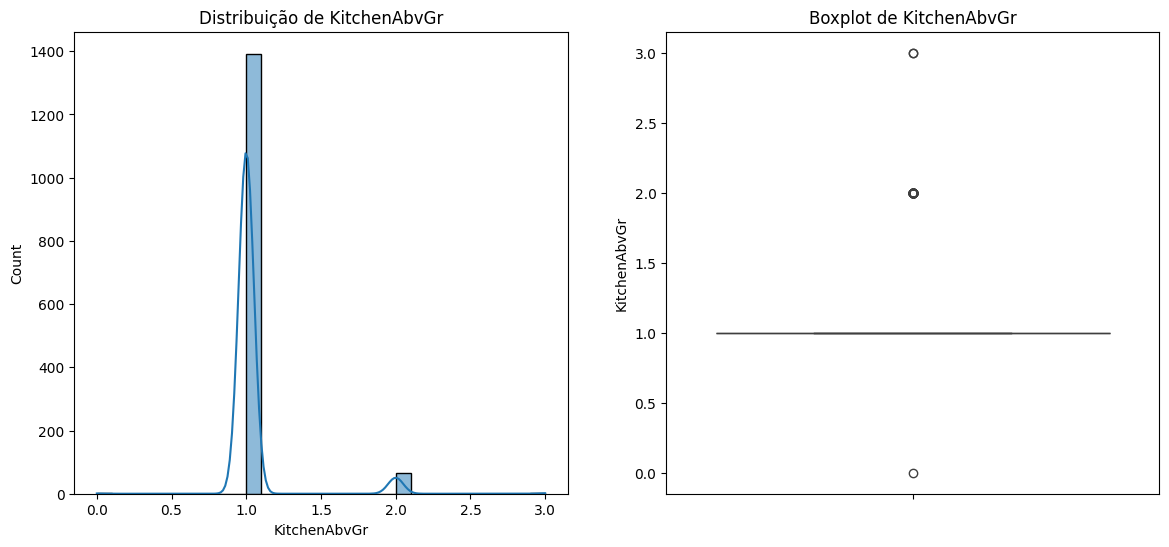

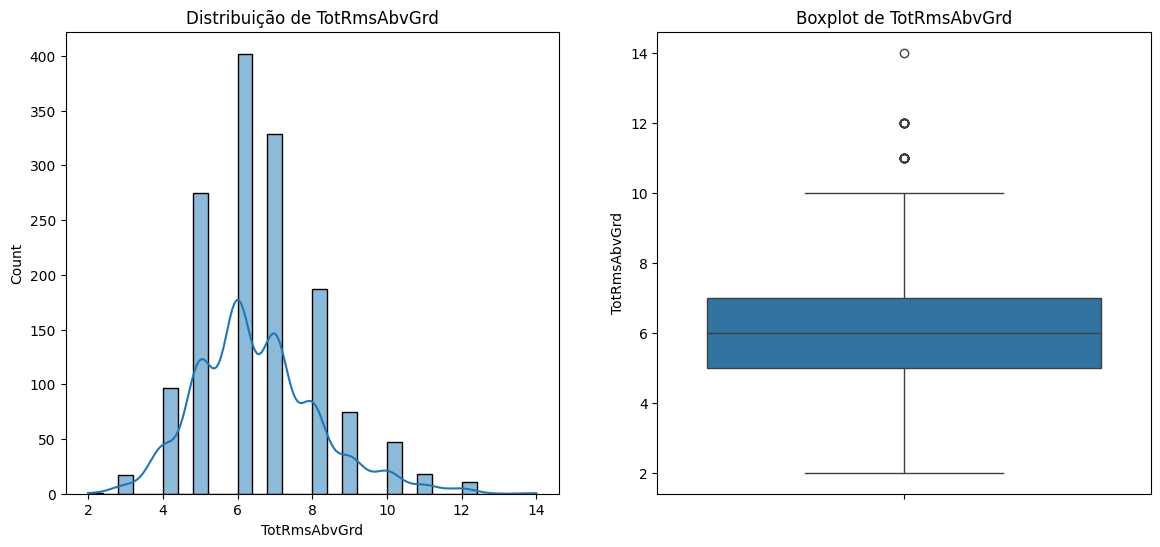

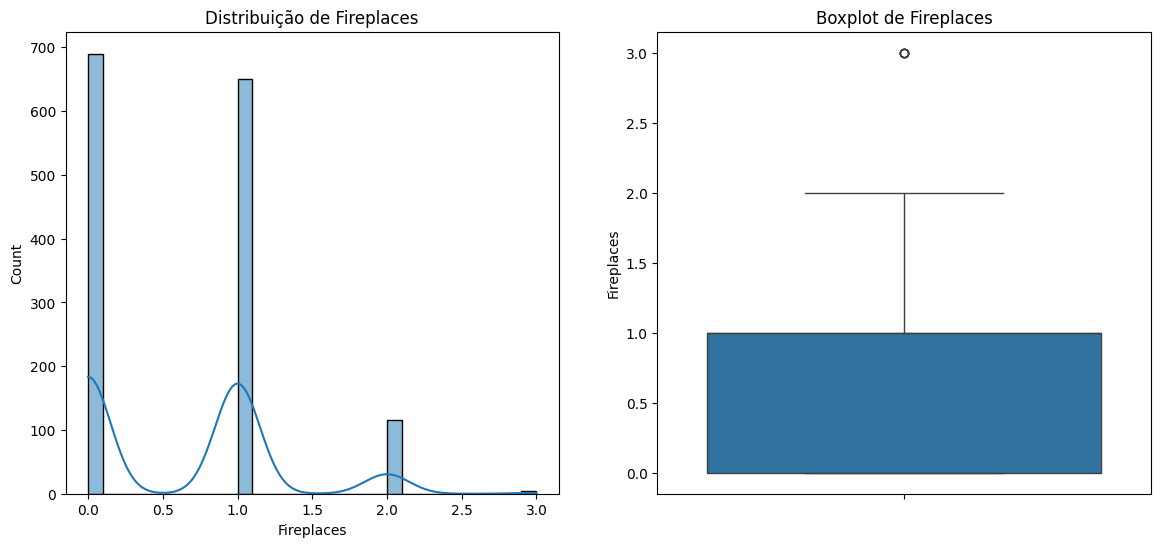

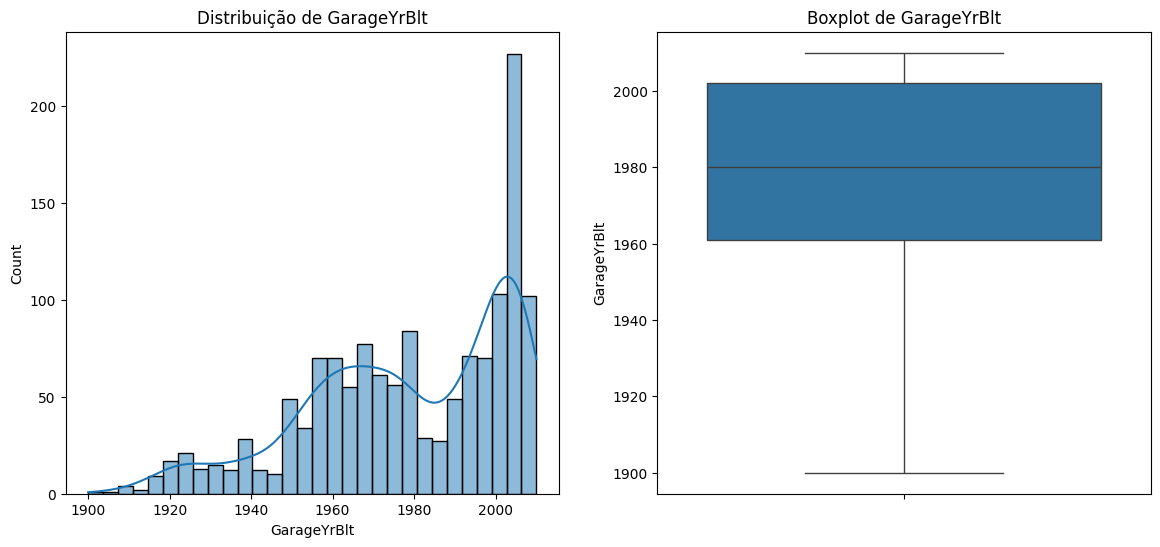

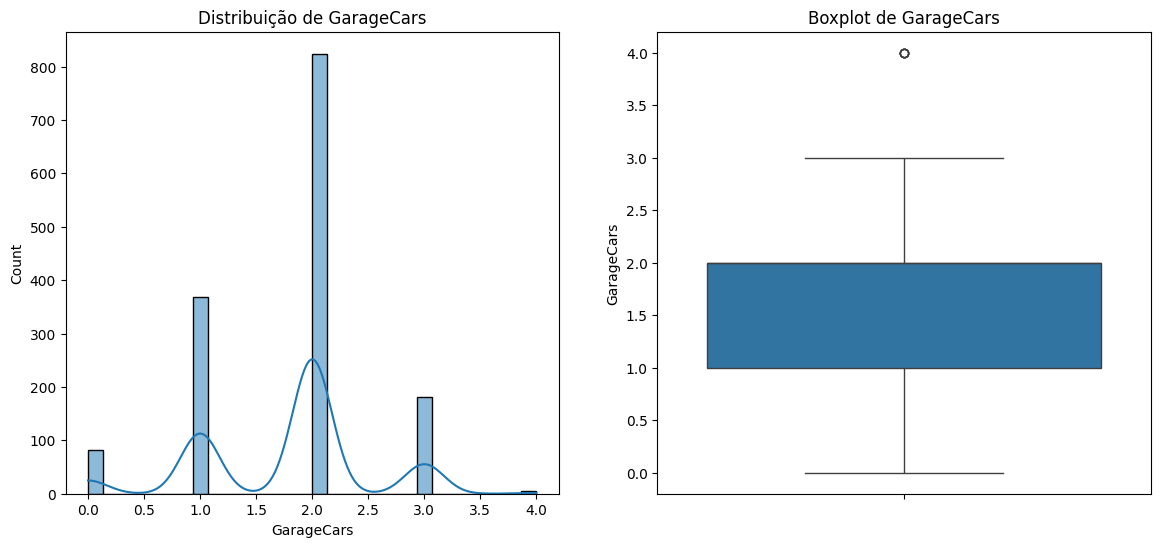

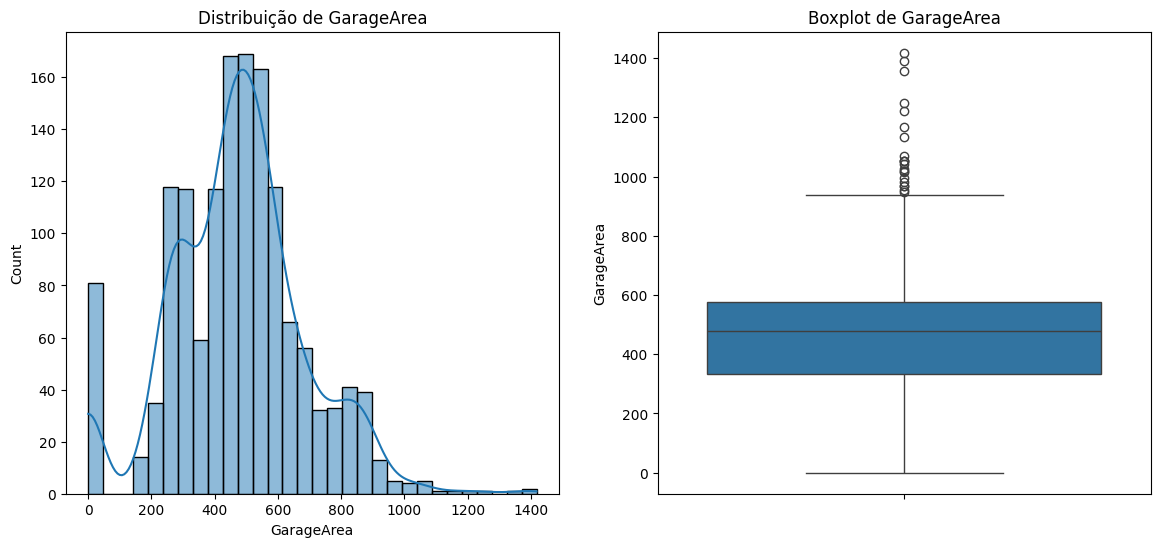

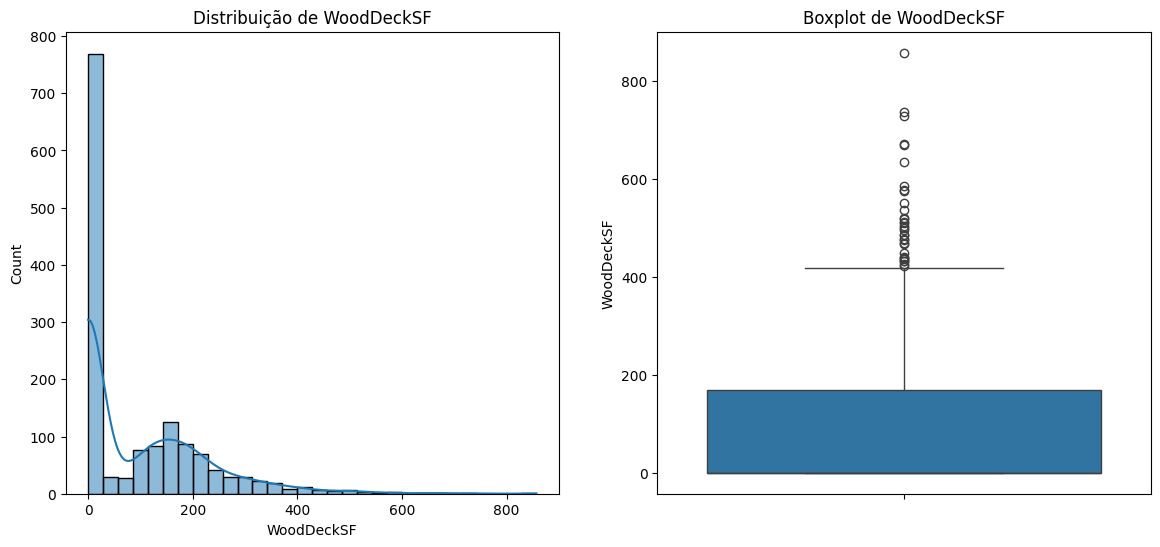

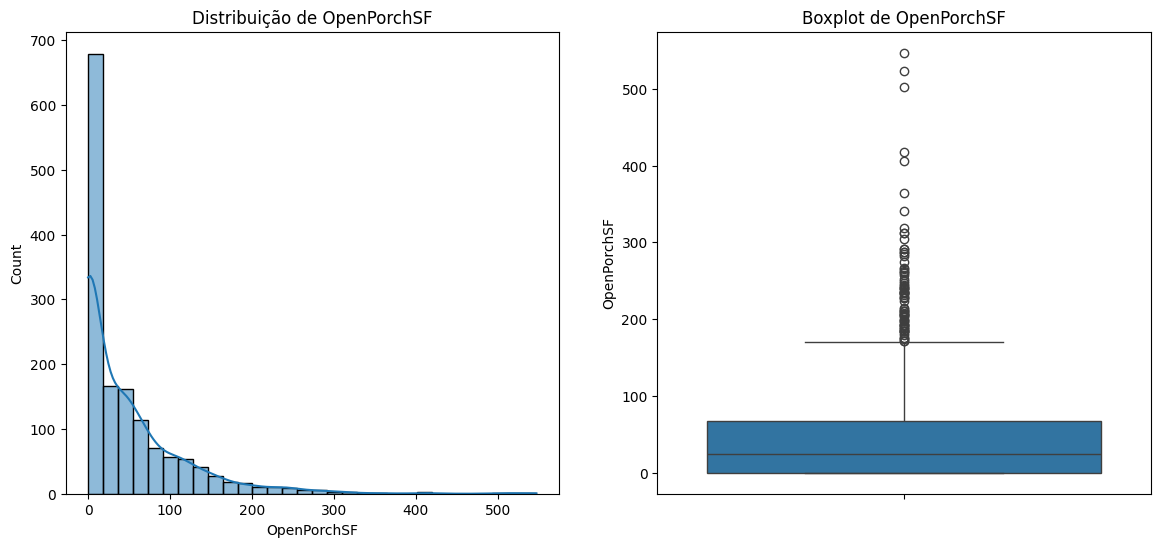

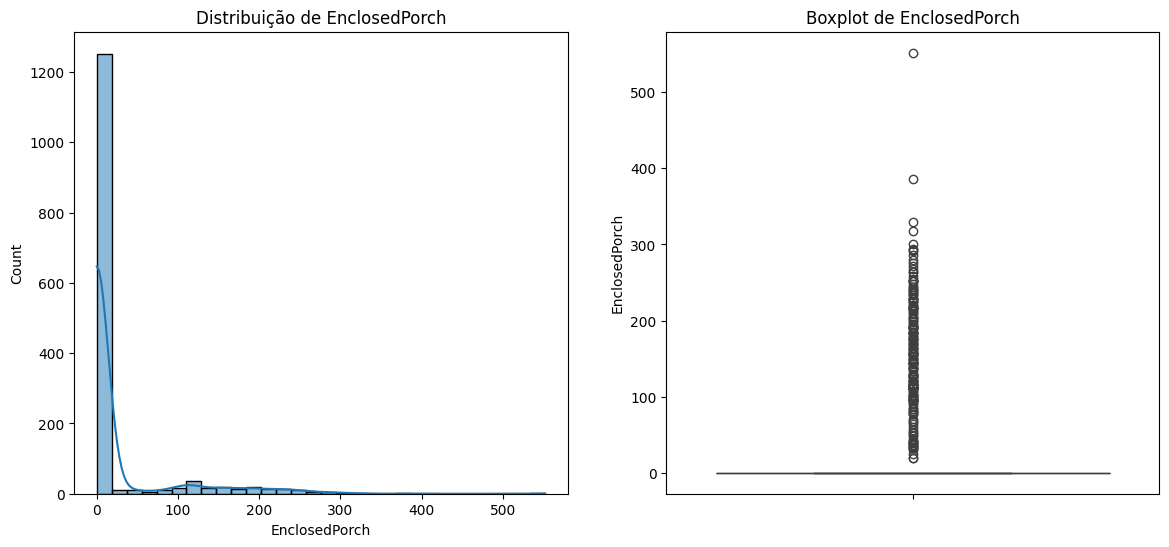

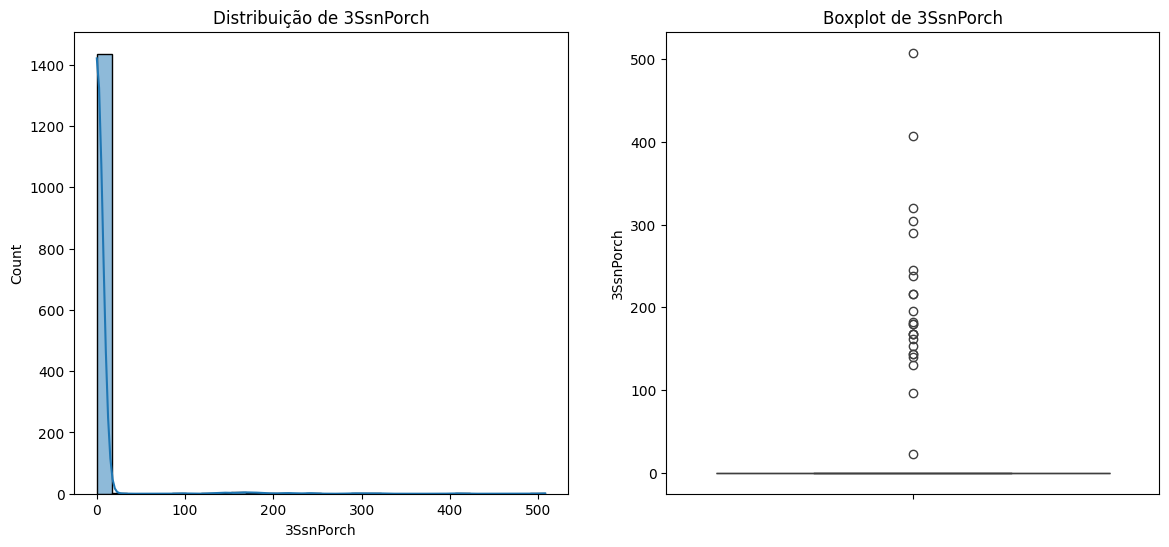

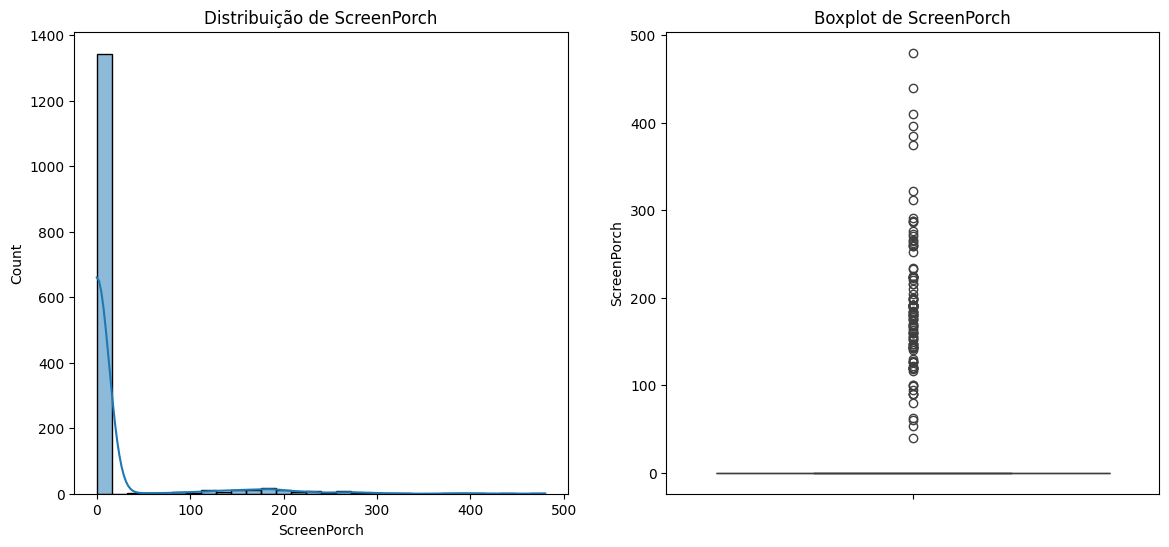

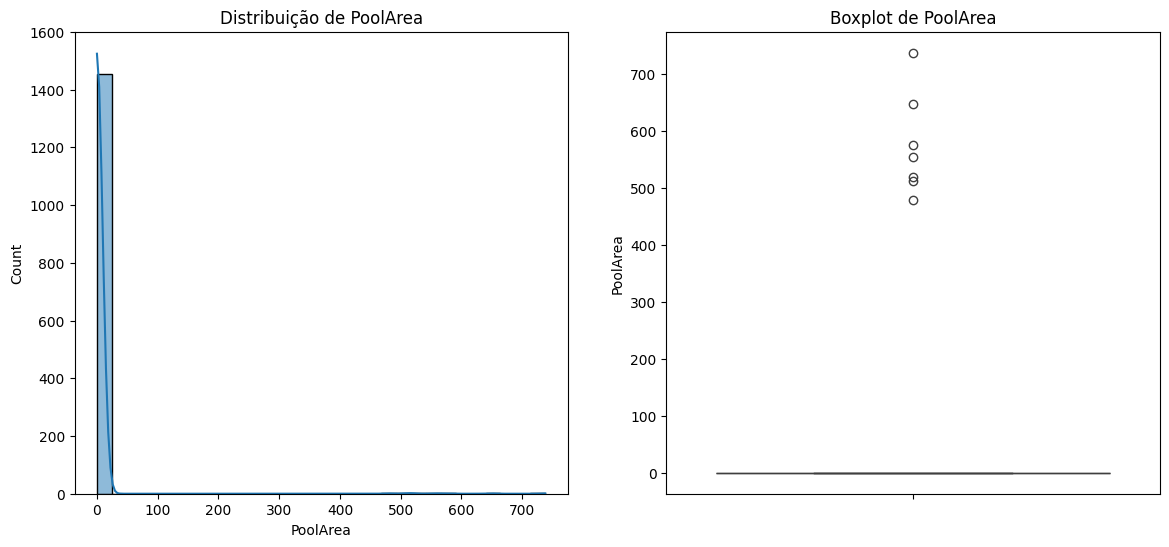

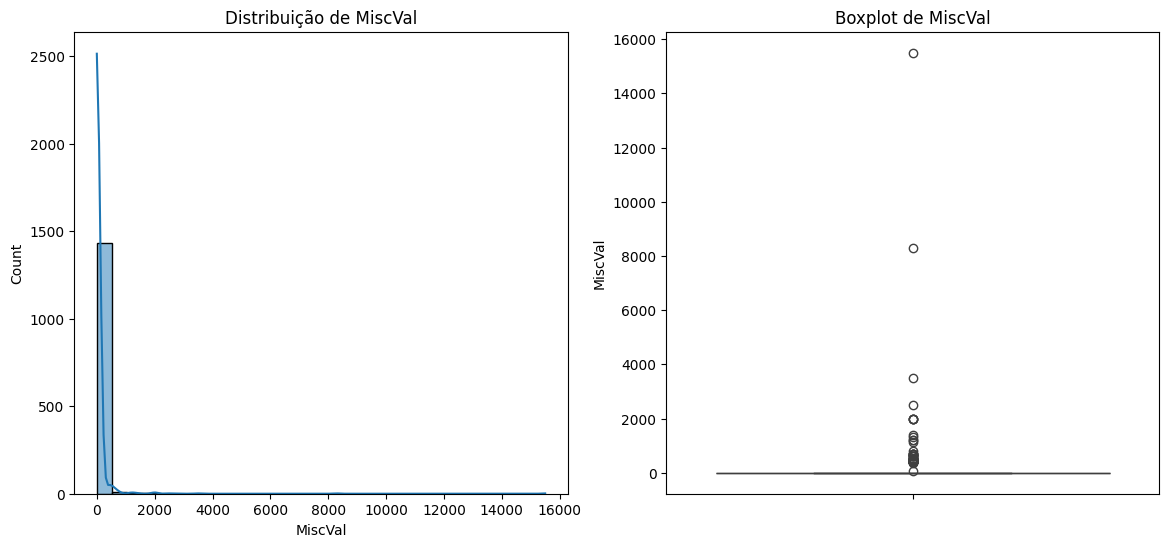

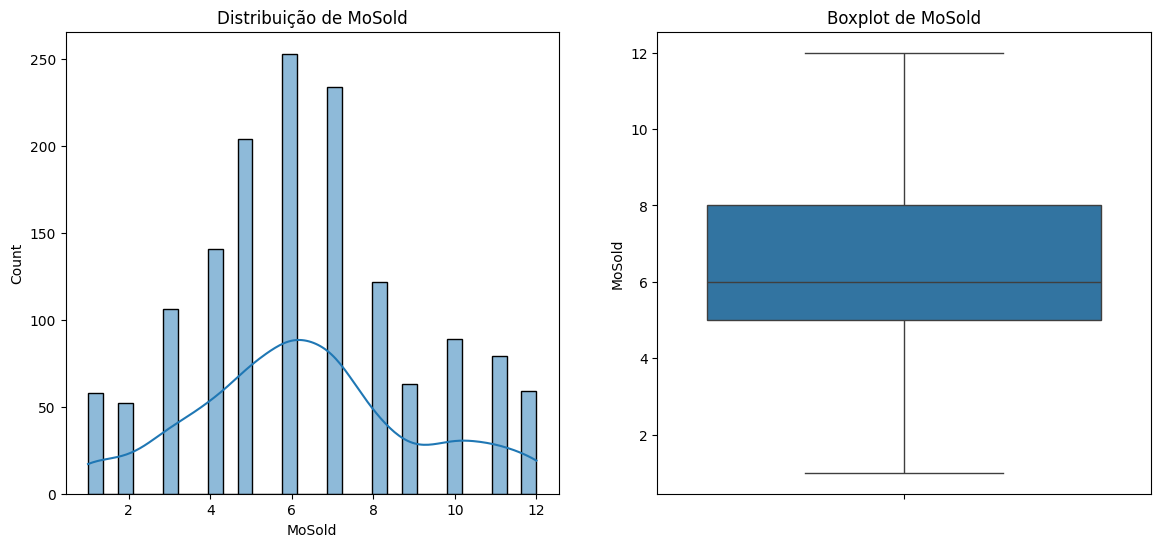

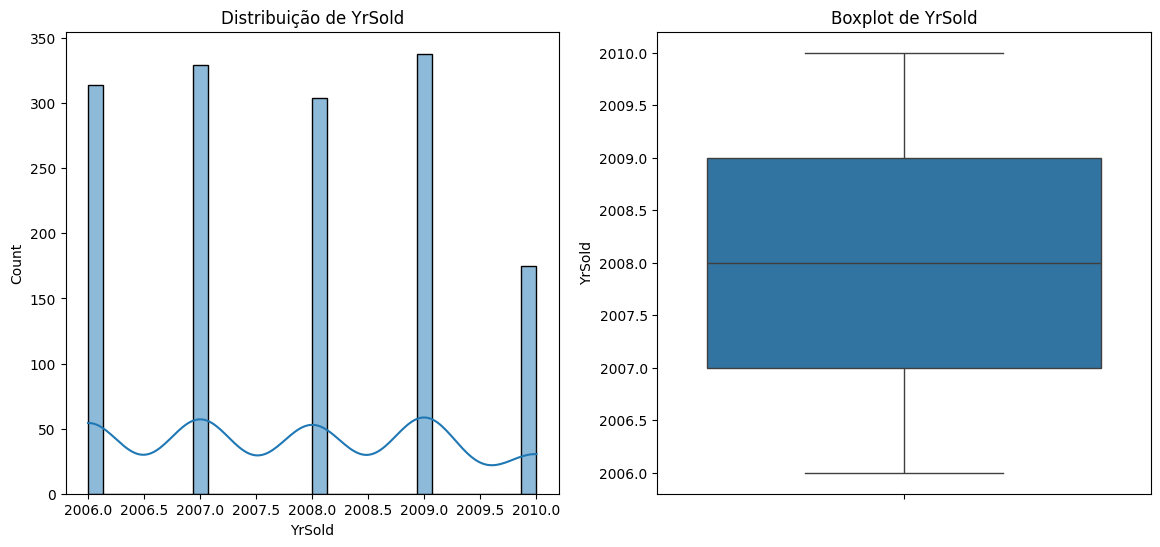

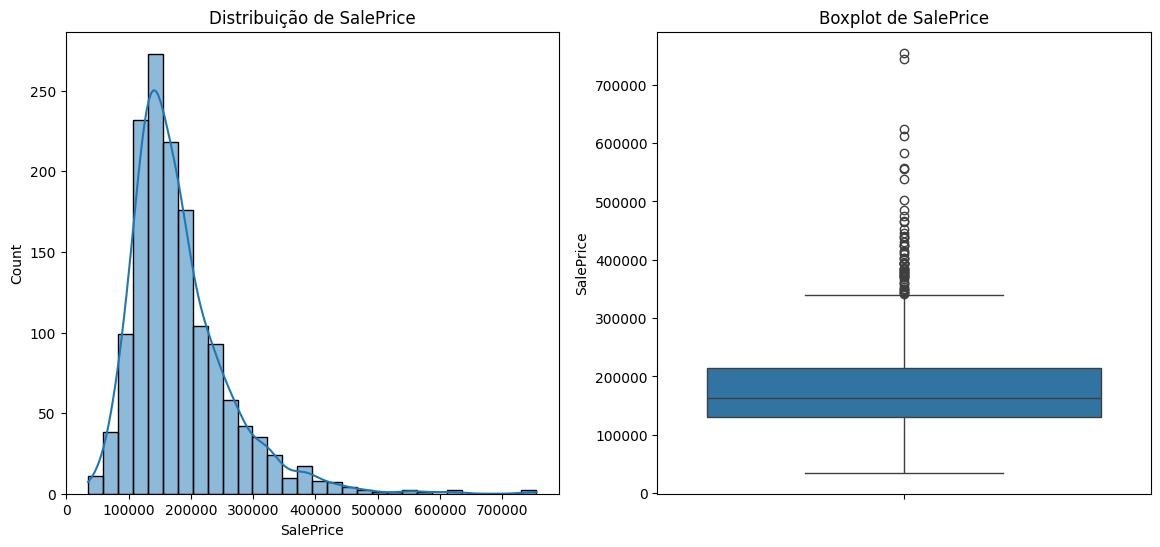

In [33]:
for col in numeric_data.columns:
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(numeric_data[col], bins=30, kde=True)
    plt.title(f'Distribuição de {col}')
    plt.subplot(1, 2, 2)
    sns.boxplot(y=numeric_data[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

In [34]:
#Contade de valores por coluna dentro dos dados categóricos

In [35]:
for col in categorical_data.columns:
    print(f'\nContagem de valores dentro de {col}:\n')
    print(categorical_data[col].value_counts())


Contagem de valores dentro de MSZoning:

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

Contagem de valores dentro de Street:

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

Contagem de valores dentro de Alley:

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

Contagem de valores dentro de LotShape:

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

Contagem de valores dentro de LandContour:

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

Contagem de valores dentro de Utilities:

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

Contagem de valores dentro de LotConfig:

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

Contagem de valores dentro de LandSlope:

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

Contagem de val

In [36]:
#Barplot para melhor visualização

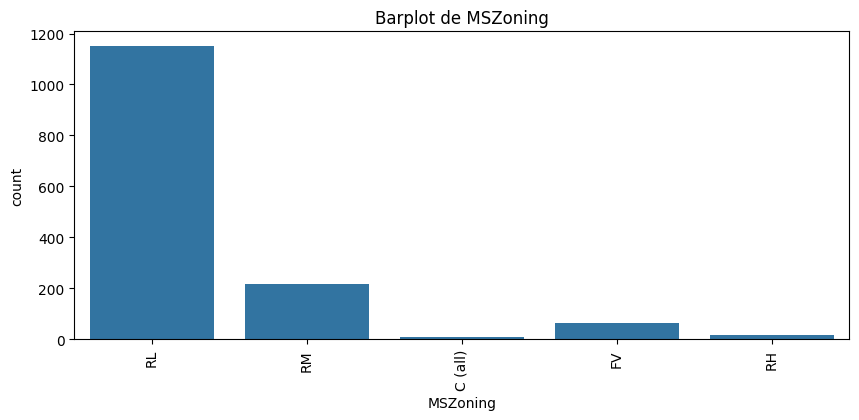

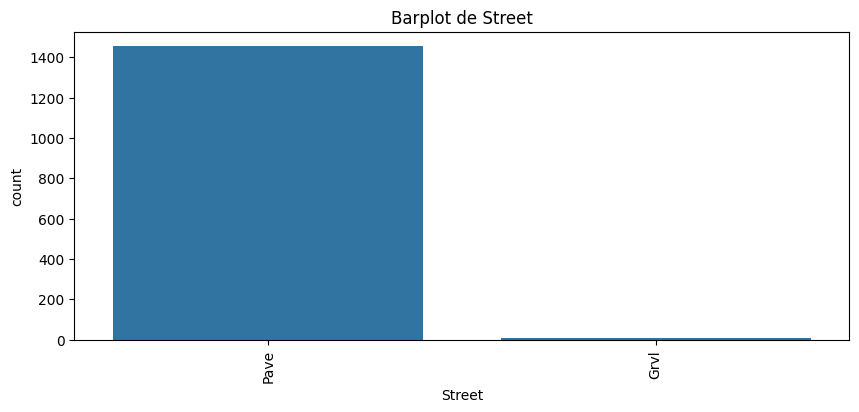

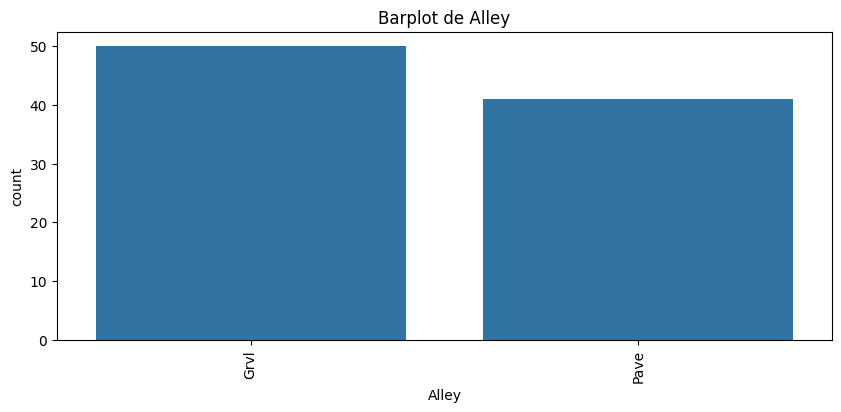

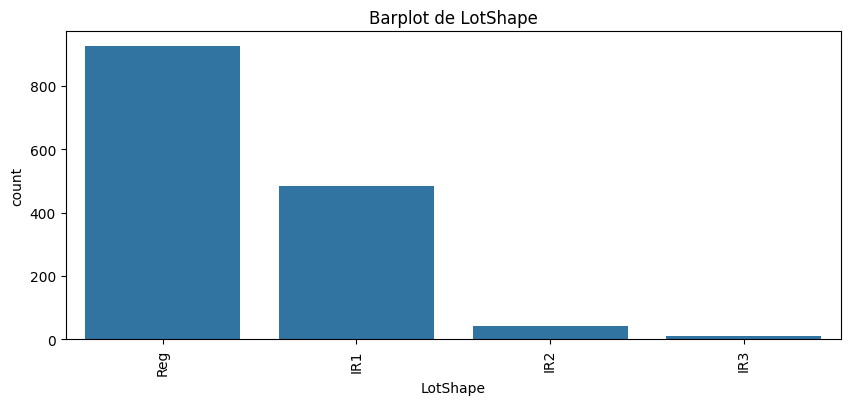

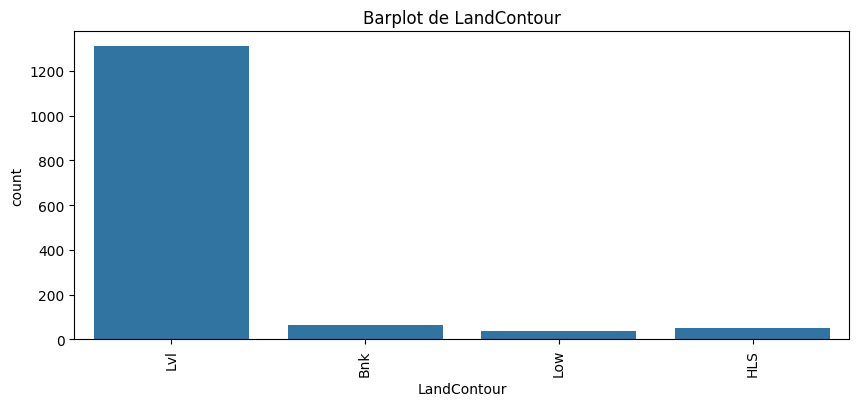

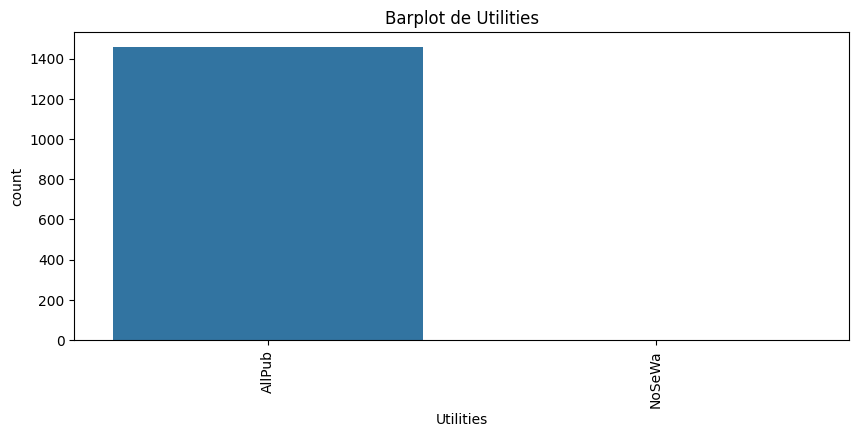

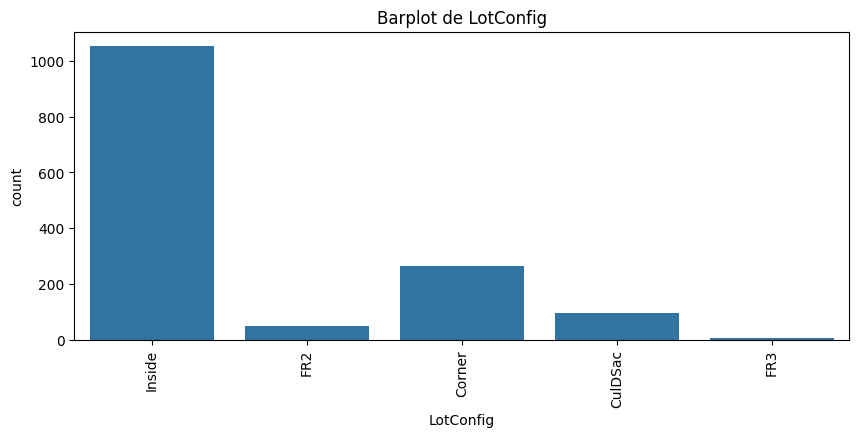

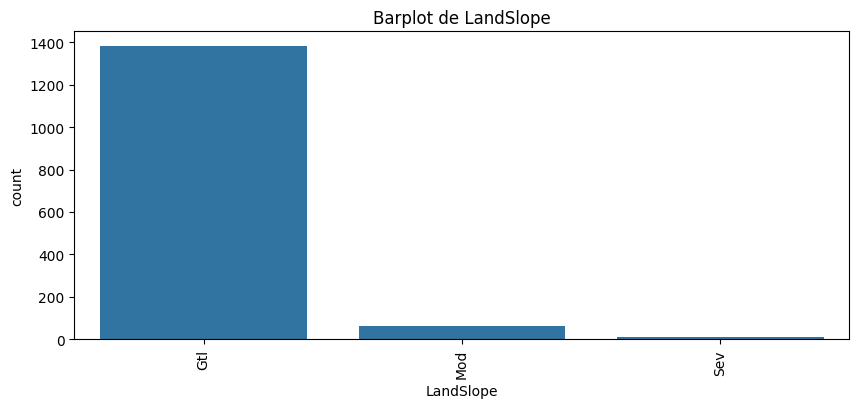

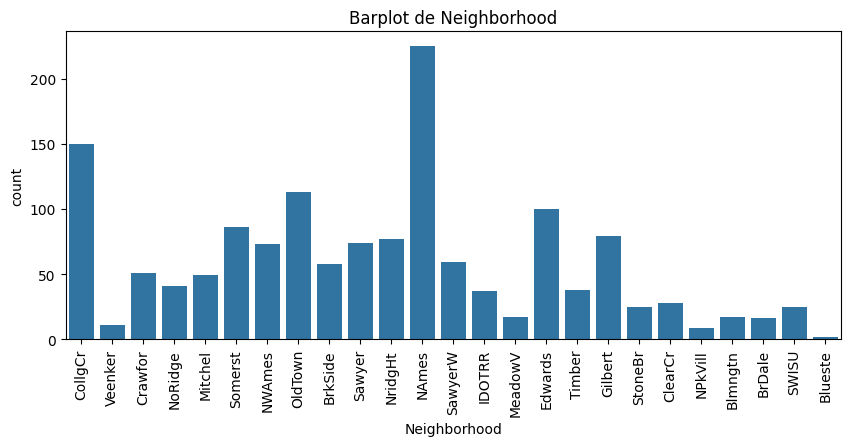

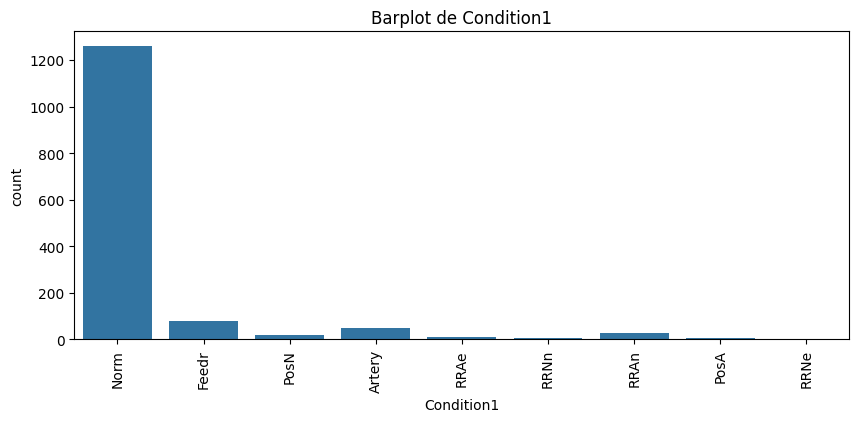

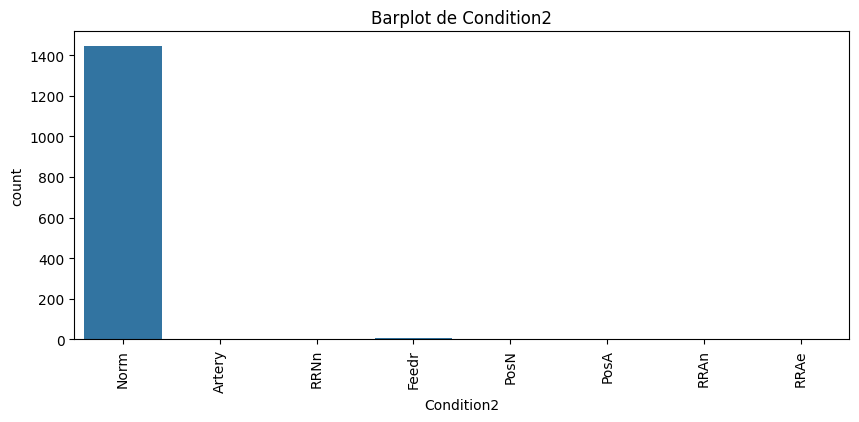

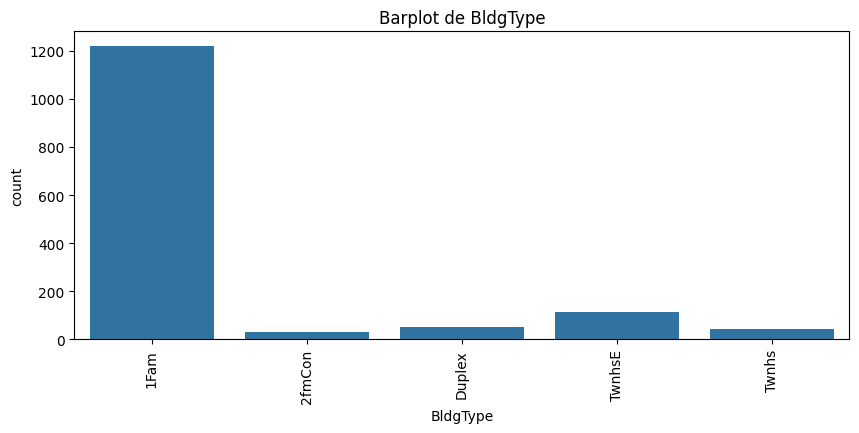

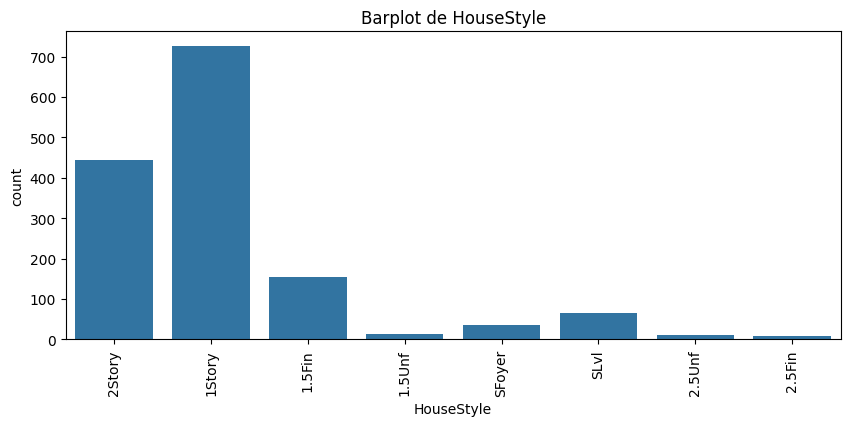

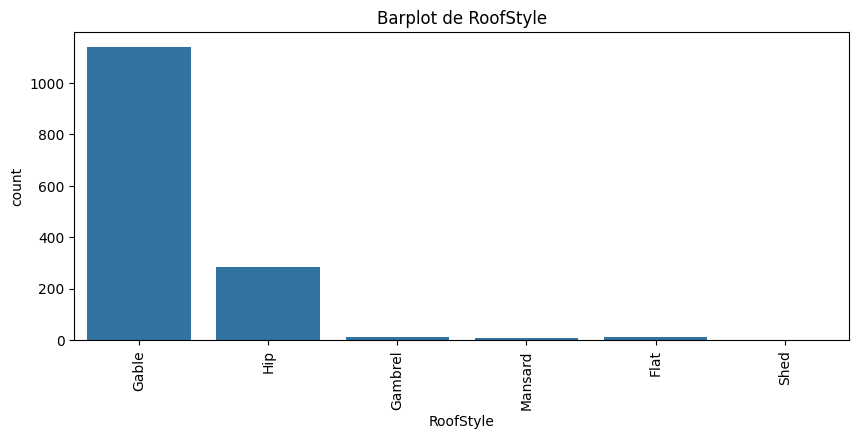

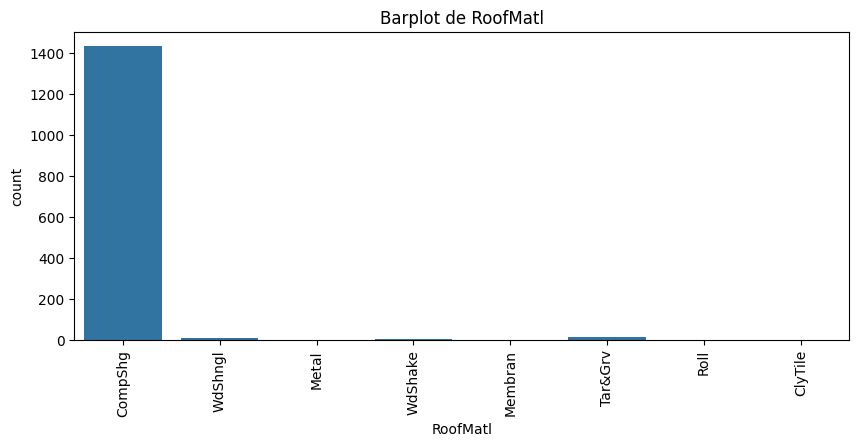

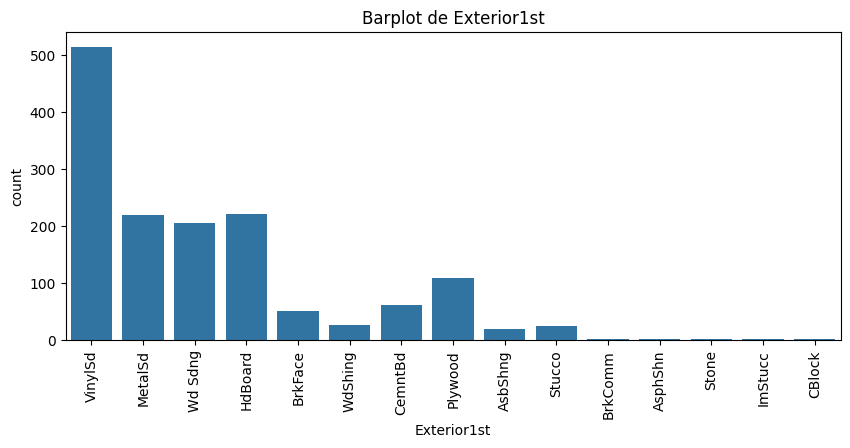

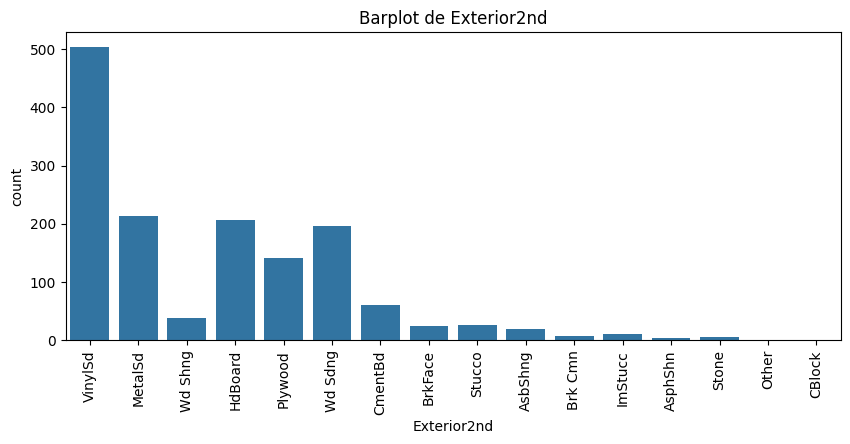

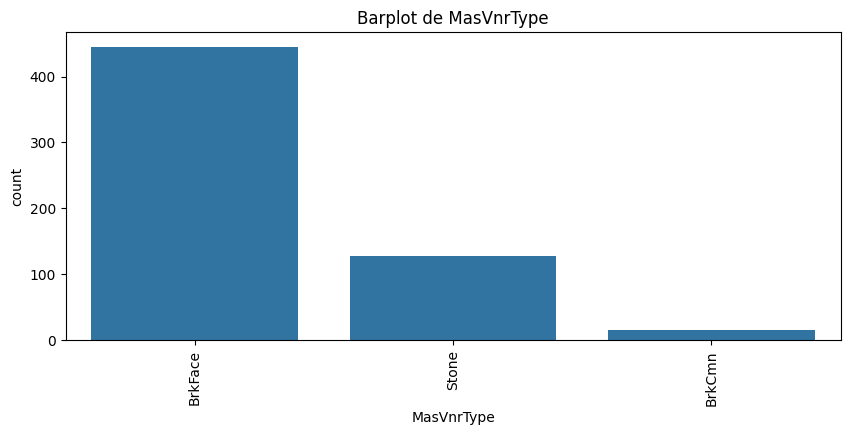

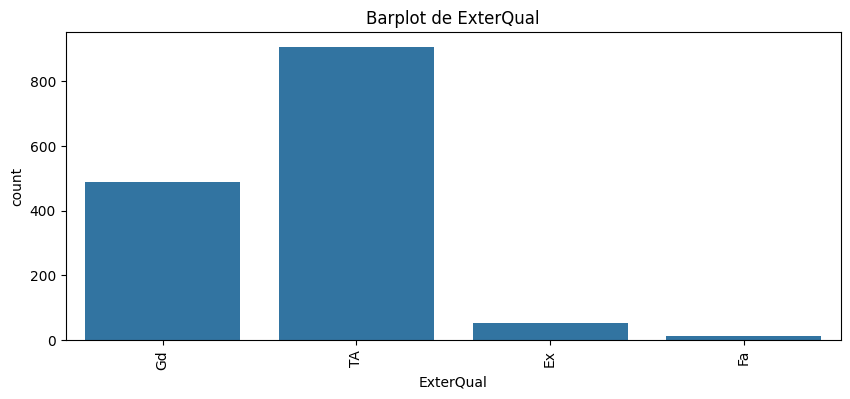

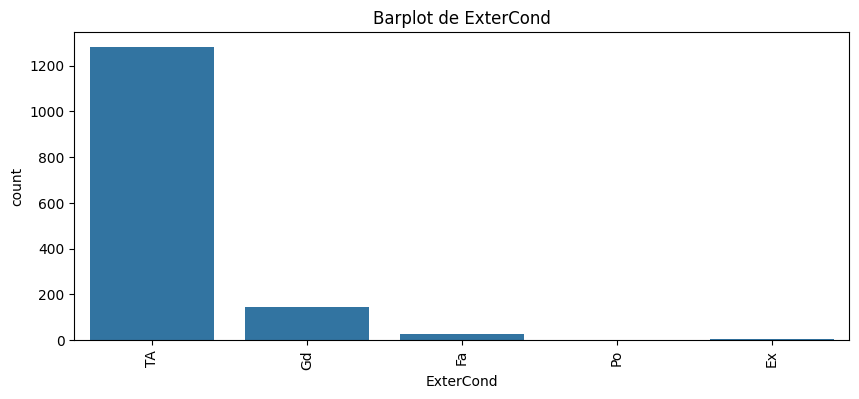

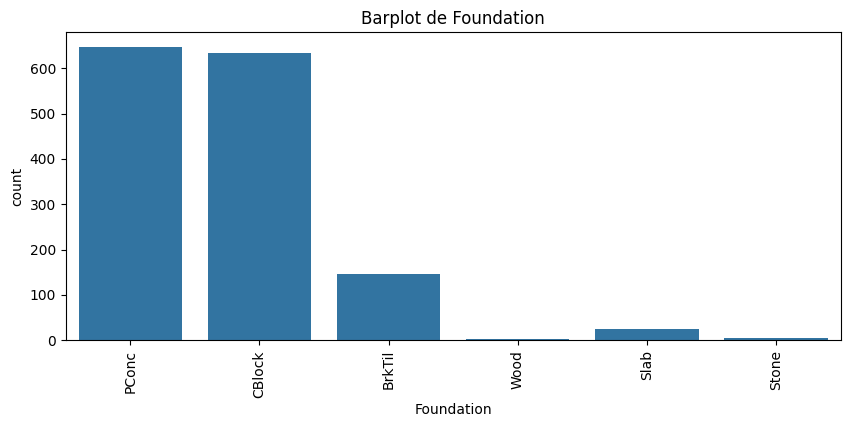

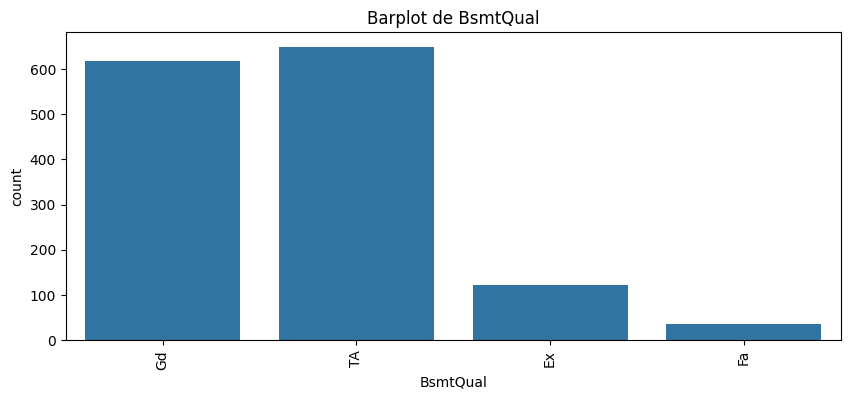

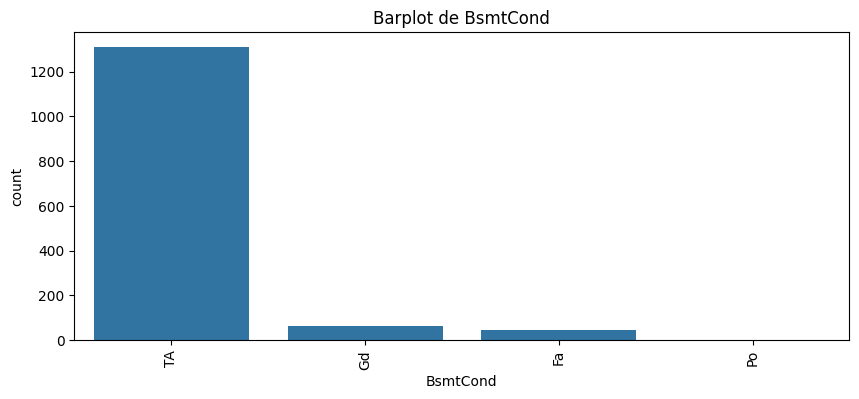

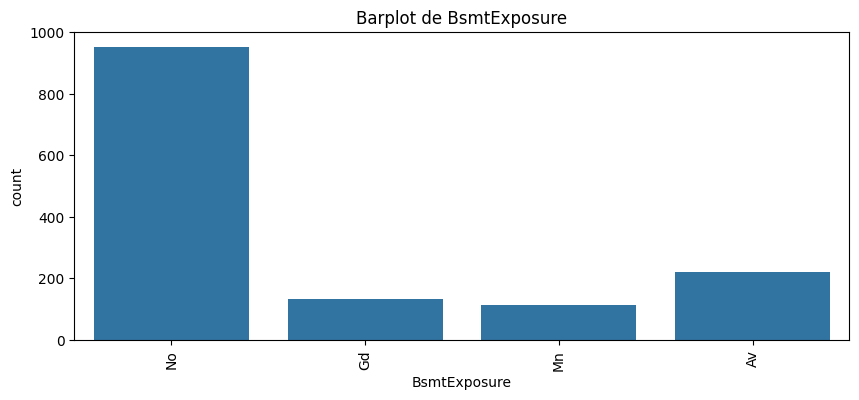

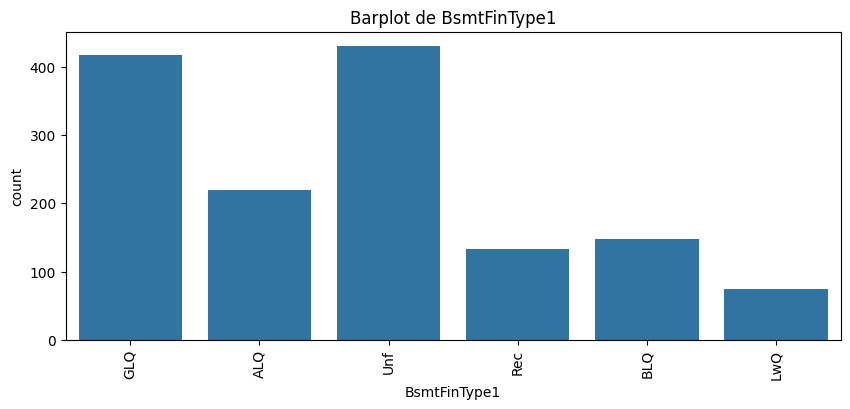

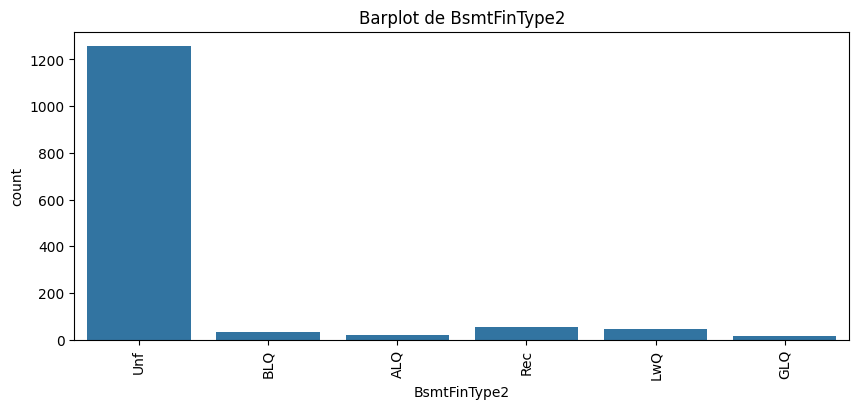

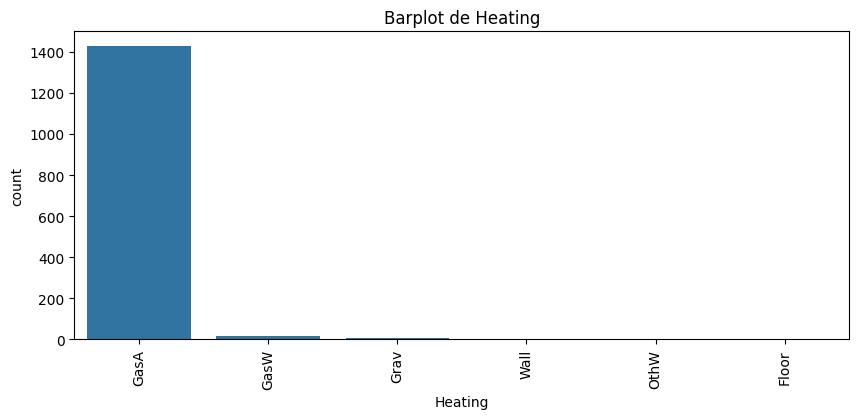

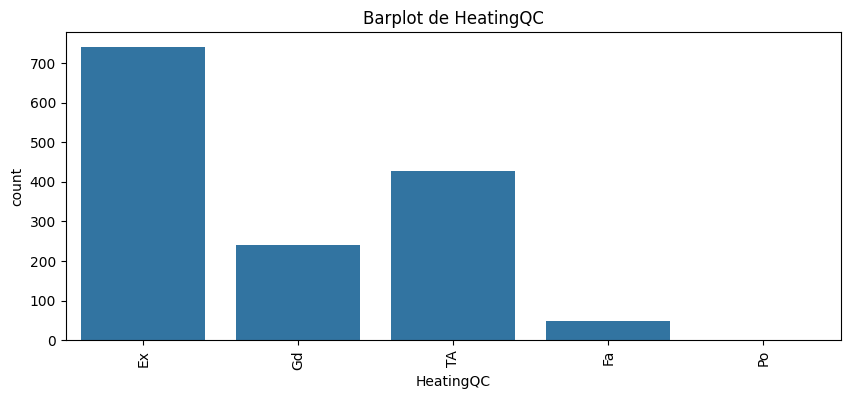

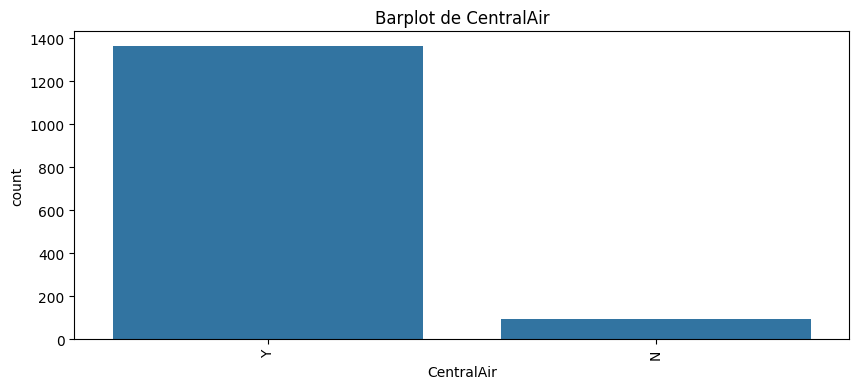

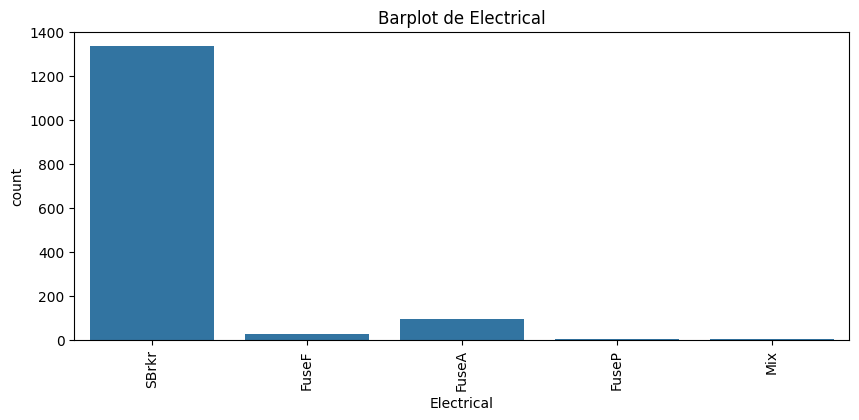

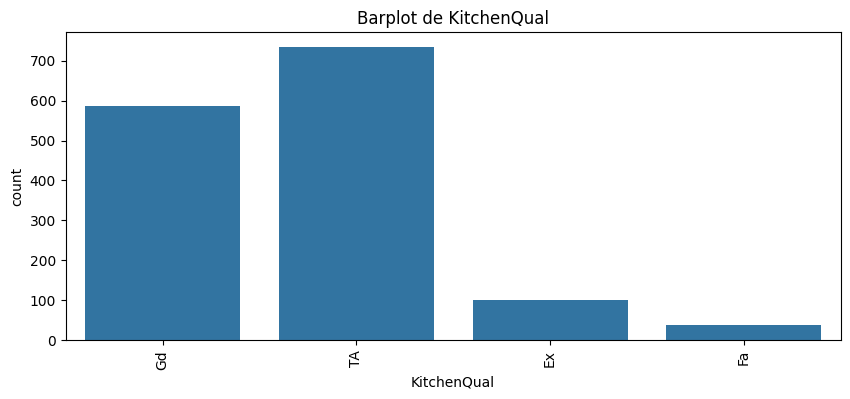

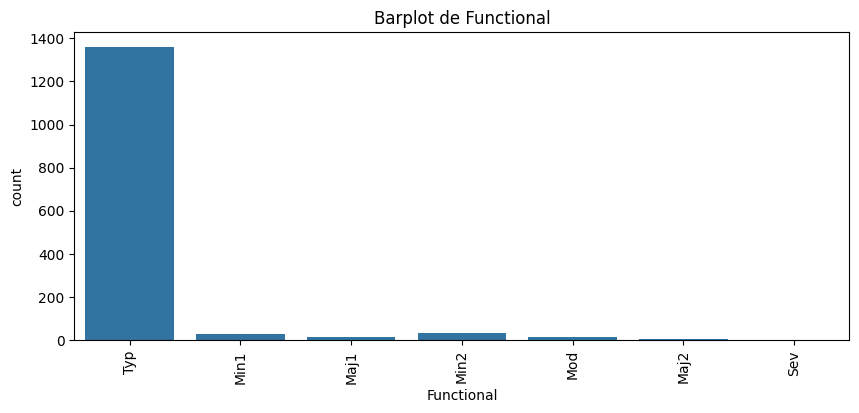

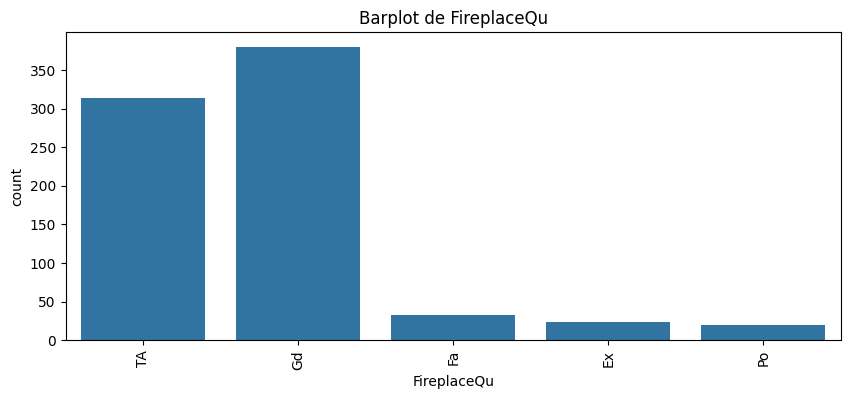

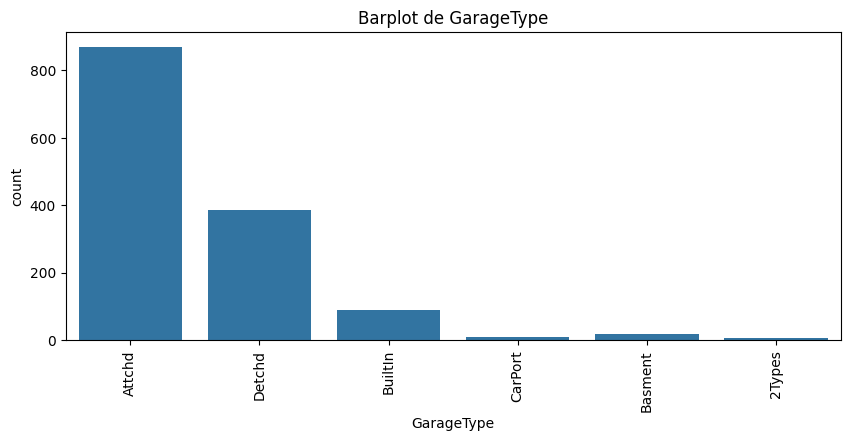

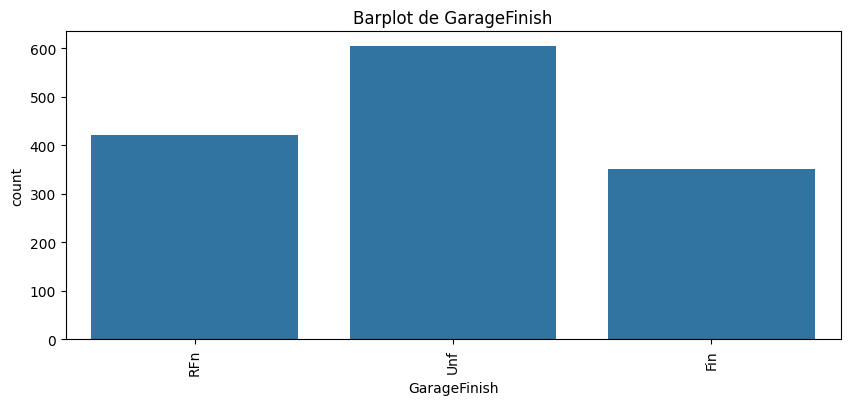

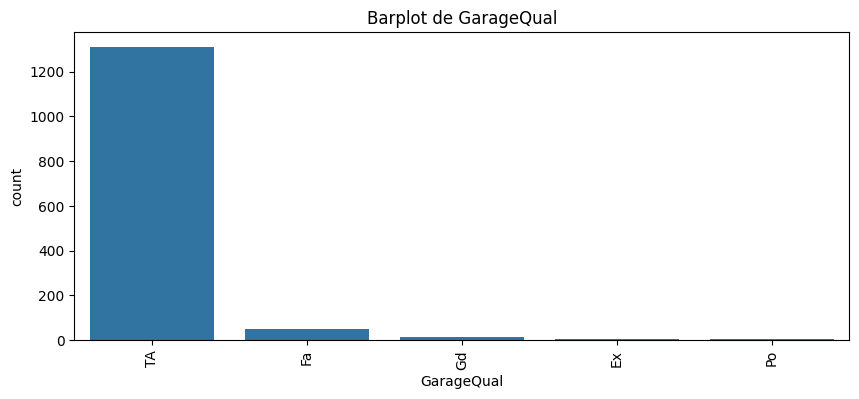

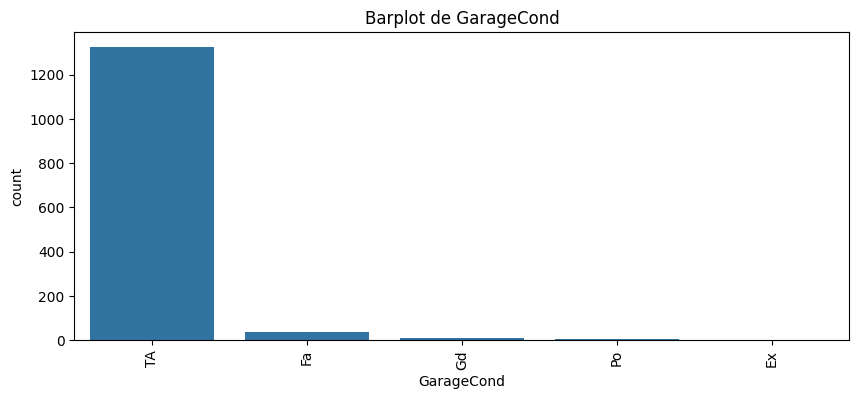

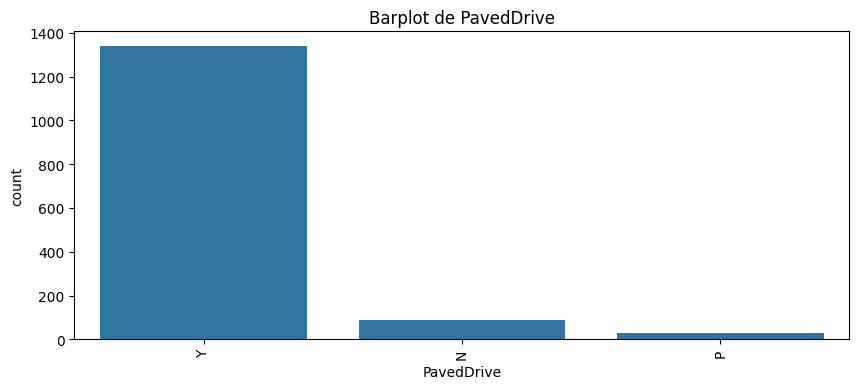

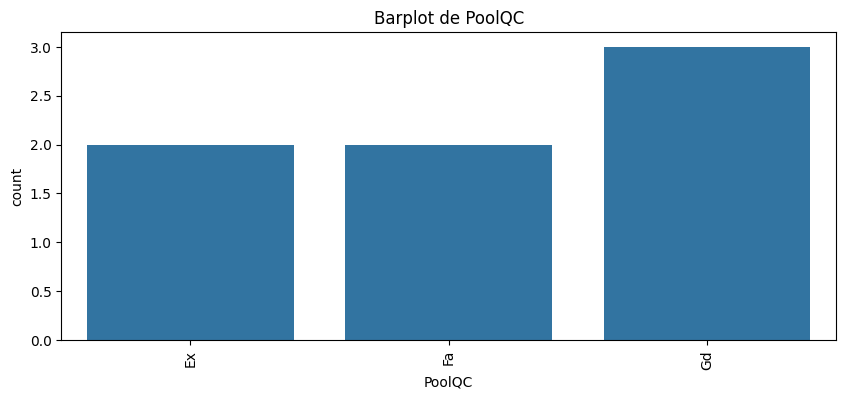

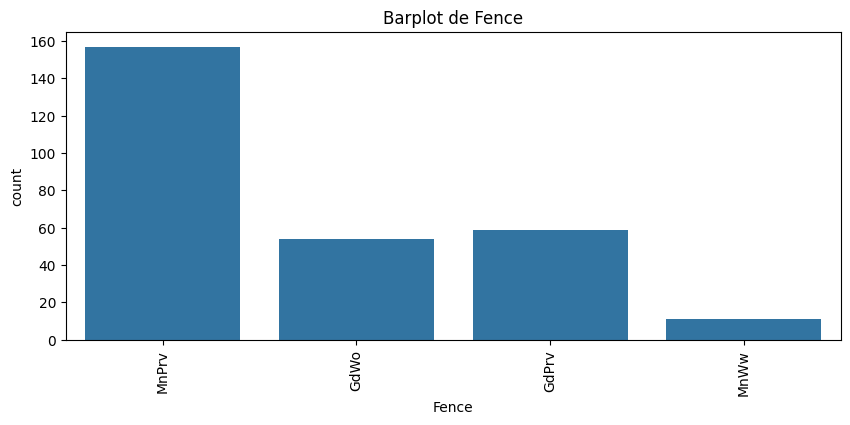

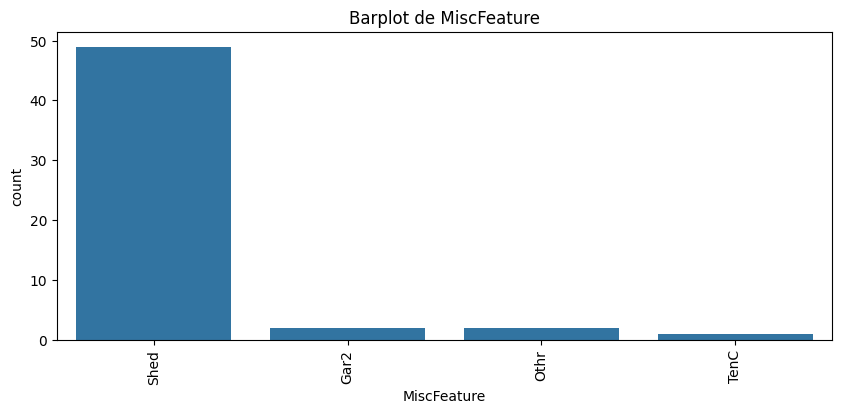

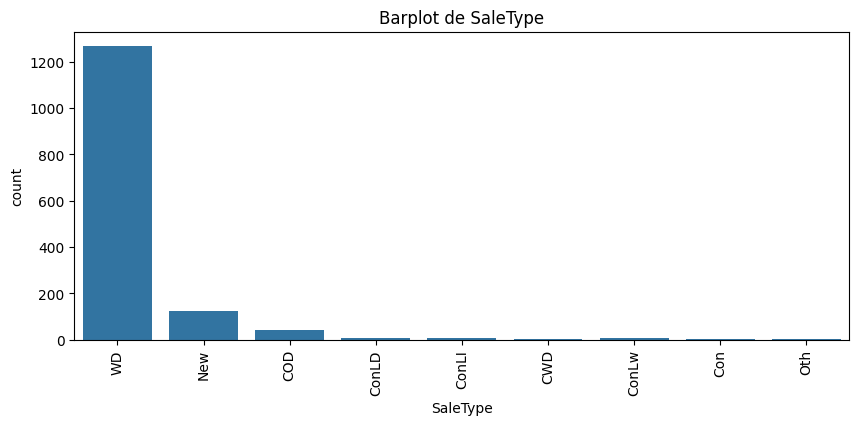

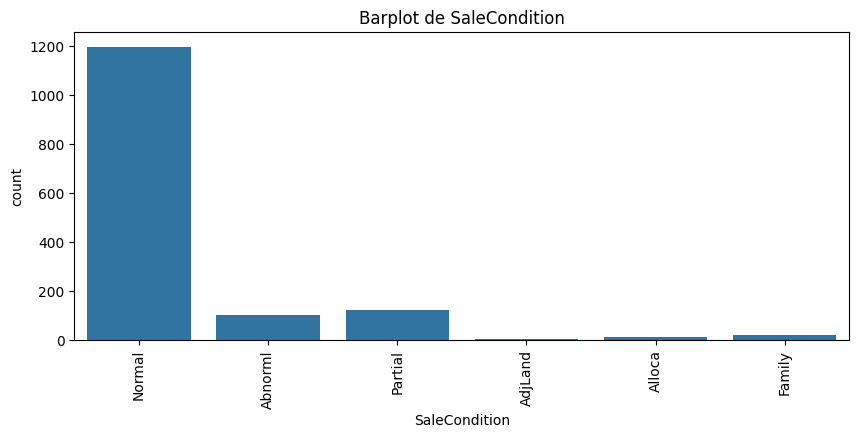

In [37]:
for col in categorical_data.columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=categorical_data[col])
    plt.title(f'Barplot de {col}')
    plt.xticks(rotation=90)
    plt.show()

In [38]:
#Verificando os Outliers

In [39]:
for col in numeric_data.columns:
    q1 = numeric_data[col].quantile(0.25)
    q3 = numeric_data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 = 1.5 * iqr
    outliers = numeric_data[col].loc[(numeric_data[col] < lower_bound) | (numeric_data[col] > upper_bound)]
    print(f'Outliers for {col}:\n')
    print(outliers)

Outliers for Id:

1094    1095
1095    1096
1096    1097
1097    1098
1098    1099
        ... 
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 366, dtype: int64
Outliers for MSSubClass:

9       190
17       90
23      120
34      120
39       90
       ... 
1441    120
1445     85
1449    180
1450     90
1452    180
Name: MSSubClass, Length: 320, dtype: int64
Outliers for LotFrontage:

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1195, dtype: float64
Outliers for LotArea:

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1250, dtype: int64
Outliers for OverallQual:

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 

In [40]:
#Matriz de correlação e heatmap

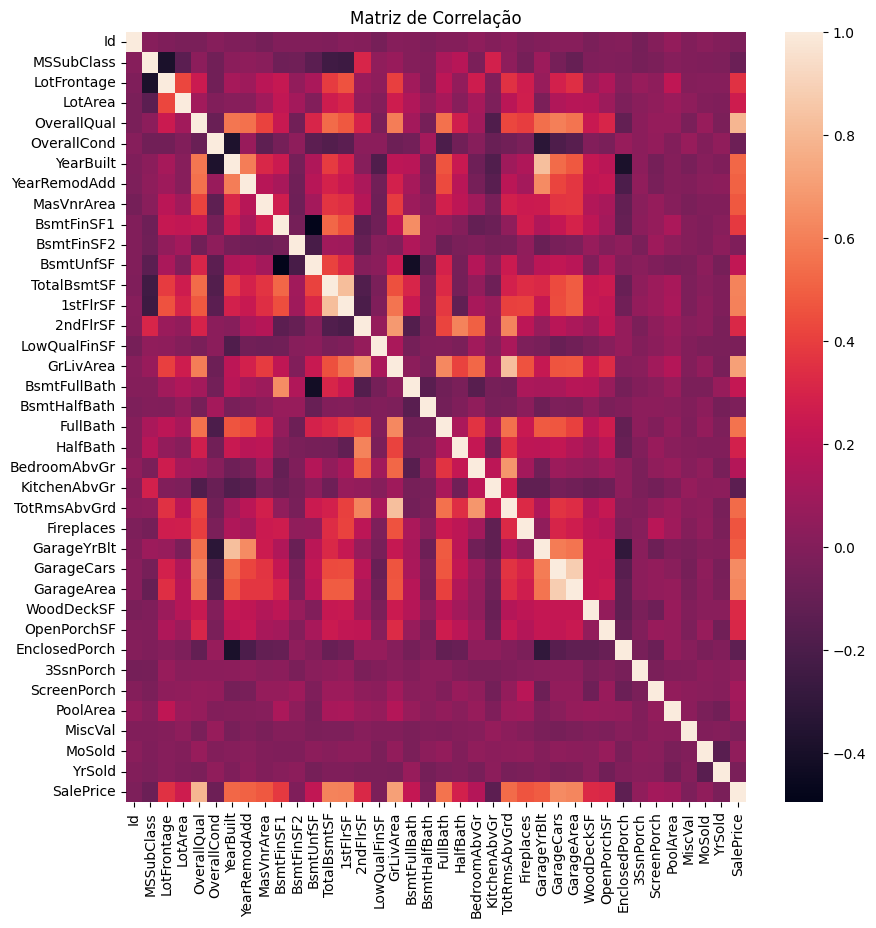

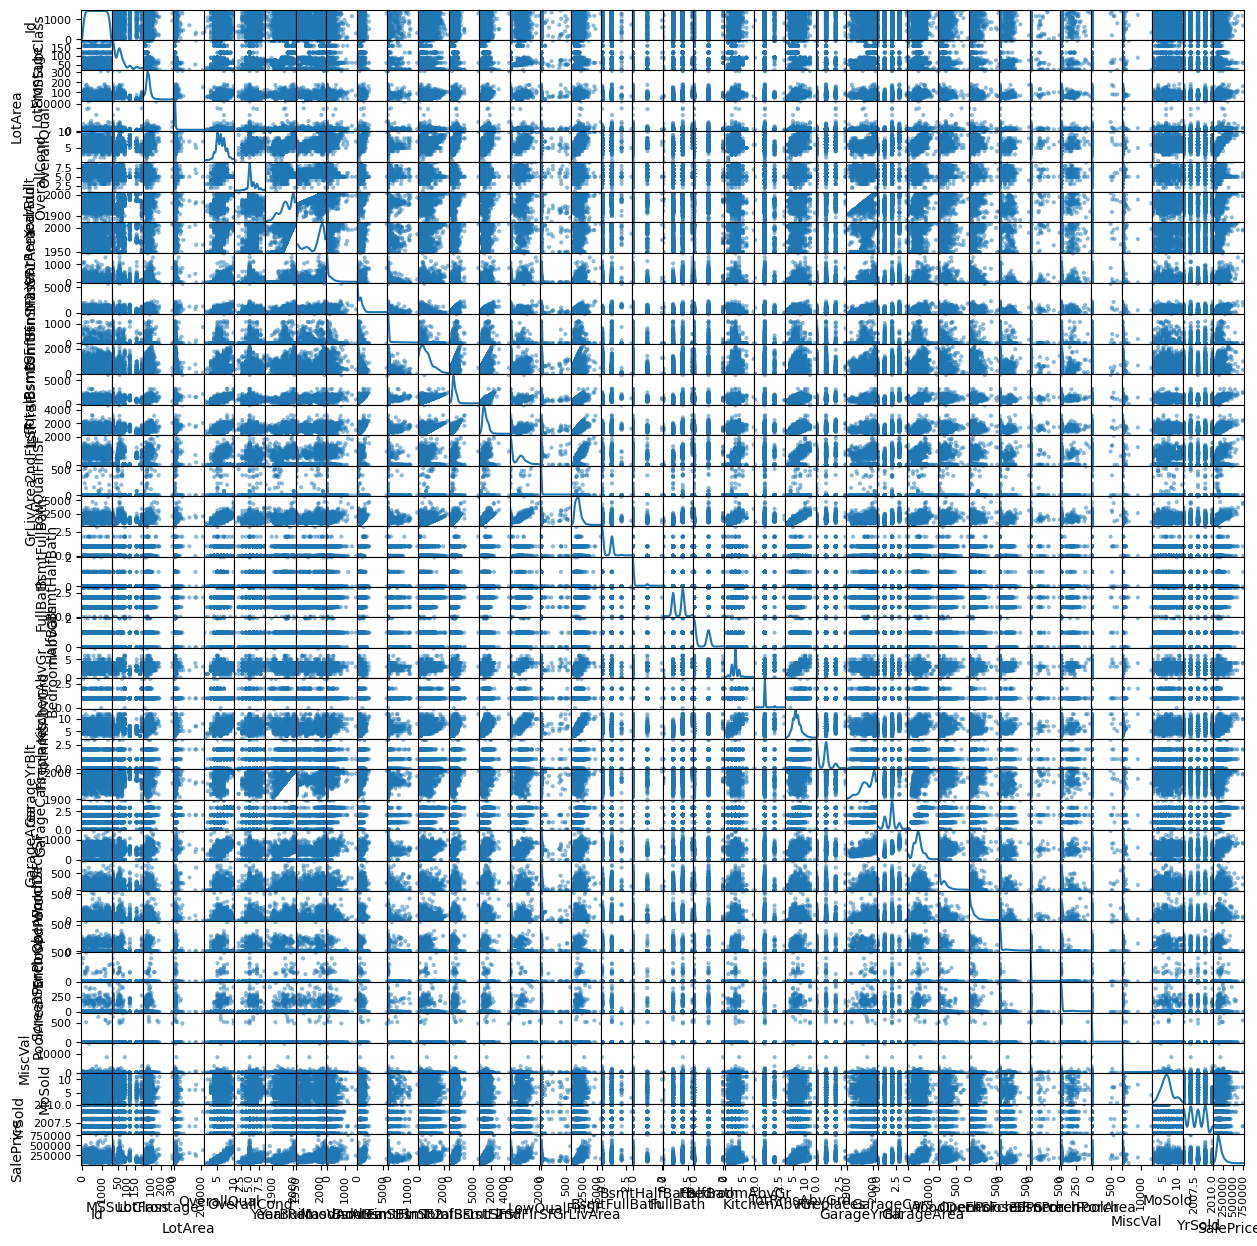

In [41]:
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix)
plt.title('Matriz de Correlação')
plt.show()
scatterplot_matrix = pd.plotting.scatter_matrix(numeric_data, figsize=(15, 15), diagonal='kde')
plt.show()